In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc
#import squidpy as sq
import random

random.seed(10)
print(random.random())

0.5714025946899135


In [ ]:
sc.settings.set_figure_params(dpi=90)

/home/julia/miniconda3/envs/stlearn_Xenium/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


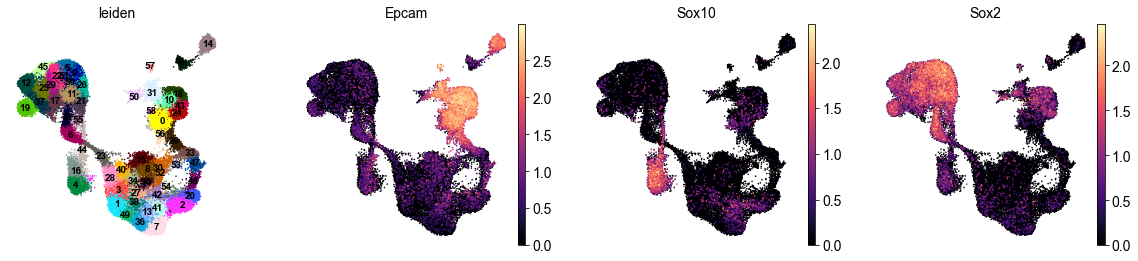

In [ ]:
adata1=sc.read_h5ad('/home/julia/Xenioum/h5ad/3_464_working_umap.h5ad')
adata1
sc.pl.umap(adata1, color=['leiden', 'Epcam', 'Sox10', 'Sox2'],  size=10, frameon=False,  color_map='magma', legend_loc='on data')

/home/julia/miniconda3/envs/stlearn_Xenium/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


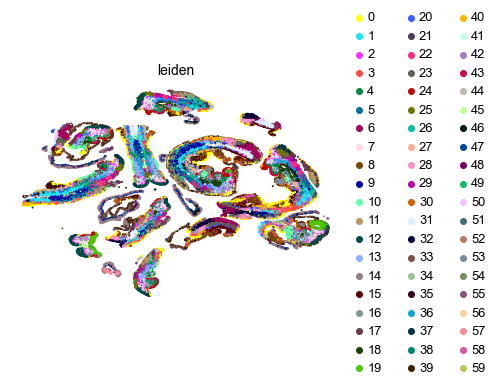

In [ ]:
sc.pl.embedding(adata1, basis="X_spatial", color=['leiden'], frameon=False, s=15, )

# List of genes from 10x_ try

In [ ]:

adata1_ep=sc.read_h5ad('/home/julia/Xenioum/h5ad/adata3_8-5_ep_clusters_annotation.h5ad')

/home/julia/miniconda3/envs/stlearn_Xenium/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [ ]:
adata1_ep

AnnData object with n_obs × n_vars = 8238 × 347
    obs: 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'region', 'EmbryonicDay_8_5', 'cell_id_duplicate', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_10_genes', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_30_genes', 'pct_counts_in_top_40_genes', 'leiden', 'highlight', 'cluster_annotation', 'Sclice', 'cluster_annotation_EPCAM'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'cluster_annotation_EPCAM_colors', 'cluster_annotation_colors', 'highlight_colors', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_spatial', 'X_umap', 'spatial'
    varm

In [ ]:
Xen_genes=adata1_ep.var_names
Xen_genes

Index(['2010300C02Rik', 'Acsbg1', 'Acta2', 'Acvrl1', 'Adamts2', 'Adamtsl1',
       'Adgrl4', 'Aldh1a2', 'Aldh1a3', 'Angpt1',
       ...
       'Vwc2l', 'Wfs1', 'Wnt1', 'Wnt3a', 'Zeb1', 'Zfp366', 'Zfp536', 'Zfpm2',
       'Zic1', 'Zic5'],
      dtype='object', length=347)

In [ ]:
adata1_ep.obs

cell_id   x_centroid   y_centroid  transcript_counts  \
0     8_5_region3_aaahajki-1  1437.855225   999.980957                 59   
1     8_5_region3_abdkbmja-1  1412.991333  1418.367676                 72   
2     8_5_region3_abdlihmb-1  1422.431763  1423.747437                 52   
3     8_5_region3_abdmiikp-1  1414.789185  1426.828247                 37   
4     8_5_region3_abdniphi-1  1419.562256  1414.147095                107   
...                      ...          ...          ...                ...   
8233  8_5_region3_oinhkfdb-1  3084.153564  2579.701172                119   
8234  8_5_region3_oinkfala-1  3077.545410  2593.743408                 83   
8235  8_5_region3_oinldhkd-1  3084.365723  2588.861328                191   
8236  8_5_region3_oinmflpc-1  3073.286865  2584.405029                 64   
8237  8_5_region3_oinohcid-1  3077.561279  2571.822754                158   

      control_probe_counts  control_codeword_counts  \
0                        0                        0   
1                        0                        0   
2                        0                        0   
3                        0                        0   
4                        0                        0   
...                    ...                      ...   
8233                     0                        0   
8234                     0                        0   
8235                     0                        0   
8236                     0                        0   
8237                     0                        0   

      unassigned_codeword_counts  deprecated_codeword_counts  total_counts  \
0                              0                           0          59.0   
1                              0                           0          72.0   
2                              0                           0          52.0   
3                              0                           0          37.0   
4                              0                           0         107.0   
...                          ...                         ...           ...   
8233                           0                           0         119.0   
8234                           0                           0          83.0   
8235                           0                           0         191.0   
8236                           0                           0          64.0   
8237                           0                           0         158.0   

       cell_area  ...  log1p_total_counts  pct_counts_in_top_10_genes  \
0     122.373442  ...            4.094345                   62.711864   
1      47.097970  ...            4.290460                   55.555556   
2      85.435628  ...            3.970292                   51.923077   
3      75.817347  ...            3.637586                   56.756757   
4      73.107971  ...            4.682131                   44.859813   
...          ...  ...                 ...                         ...   
8233   84.351878  ...            4.787492                   45.378151   
8234   56.806565  ...            4.430817                   50.602410   
8235  119.438286  ...            5.257495                   43.455497   
8236  122.463754  ...            4.174387                   56.250000   
8237  132.082036  ...            5.068904                   50.000000   

      pct_counts_in_top_20_genes pct_counts_in_top_30_genes  \
0                      81.355932                  98.305085   
1                      76.388889                  90.277778   
2                      76.923077                  96.153846   
3                      83.783784                 100.000000   
4                      70.093458                  85.046729   
...                          ...                        ...   
8233                   67.226891                  81.512605   
8234                   75.903614                  89.156627   
8235                   67.539267                  79.0

In [ ]:
adata1_ep.obs['cluster_annotation_EPCAM' ].unique().tolist()

['neural crest',
 'olfactory',
 'trigeminal',
 'epithelium ventral',
 'gut',
 'epibranchial ectoderm',
 'abdominal epithelium',
 'ectoderm mandibular epibranchial',
 'epibranchial placodes',
 'otic',
 'foregut',
 'extraembryonic',
 'Cardiac',
 'epithelium caudal']

/home/julia/miniconda3/envs/stlearn_Xenium/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


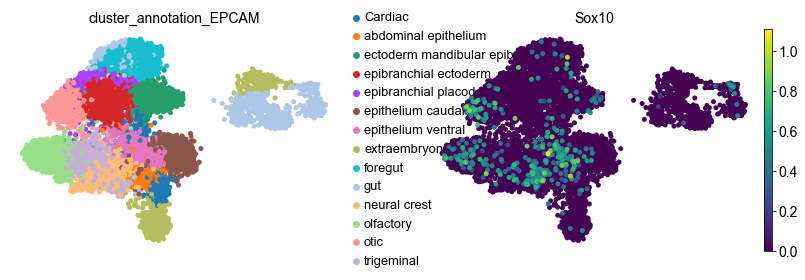

In [ ]:
sc.pl.umap(adata1_ep, color=['cluster_annotation_EPCAM' , 'Sox10'], size=100, frameon=False)

In [ ]:
selected_clusters = [
'olfactory',
'trigeminal',
'epithelium ventral',
 'epibranchial ectoderm',
 'abdominal epithelium',
 'ectoderm mandibular epibranchial',
'epibranchial placodes',
 'otic',
 'epithelium caudal'
]
subset = adata1_ep[adata1_ep.obs['cluster_annotation_EPCAM'].isin(selected_clusters)].copy()


In [ ]:
subset

AnnData object with n_obs × n_vars = 4934 × 347
    obs: 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'region', 'EmbryonicDay_8_5', 'cell_id_duplicate', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_10_genes', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_30_genes', 'pct_counts_in_top_40_genes', 'leiden', 'highlight', 'cluster_annotation', 'Sclice', 'cluster_annotation_EPCAM'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'cluster_annotation_EPCAM_colors', 'cluster_annotation_colors', 'highlight_colors', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_spatial', 'X_umap', 'spatial'
    varm

In [ ]:
sc.pp.normalize_total(subset, target_sum=1e4)
sc.pp.log1p(subset)
sc.pp.highly_variable_genes(subset, n_top_genes=347)
subset = subset[:, subset.var.highly_variable]


/home/julia/miniconda3/envs/stlearn_Xenium/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:279: UserWarning: `n_top_genes` > number of normalized dispersions, returning all genes with normalized dispersions.
  warnings.warn(


In [ ]:
sc.pp.scale(subset)
sc.tl.pca(subset, svd_solver='arpack')
sc.pp.neighbors(subset, n_neighbors=30, n_pcs=30)
sc.tl.umap(subset)


/home/julia/miniconda3/envs/stlearn_Xenium/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [ ]:
sc.tl.leiden(subset, resolution=0.6)


/home/julia/miniconda3/envs/stlearn_Xenium/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


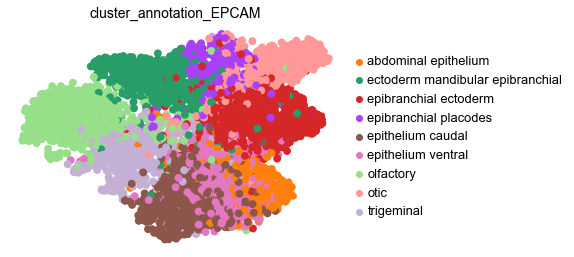

In [ ]:
sc.pl.umap(
    subset,
    color='cluster_annotation_EPCAM',
    #palette=highlight_colors,
    size=250,
    frameon=False,# save='NC_trigeminal_slice3__UMAP.png'
)
   # legend_loc='on data'



In [ ]:
subset

AnnData object with n_obs × n_vars = 4934 × 347
    obs: 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'region', 'EmbryonicDay_8_5', 'cell_id_duplicate', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_10_genes', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_30_genes', 'pct_counts_in_top_40_genes', 'leiden', 'highlight', 'cluster_annotation', 'Sclice', 'cluster_annotation_EPCAM'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'cluster_annotation_EPCAM_colors', 'cluster_annotation_colors', 'highlight_colors', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'rank_gene

In [ ]:
custom_palette = {
    'olfactory': '#f1c40f',  # yellow
    'trigeminal': '#e67e22',  # orange
   'ectoderm mandible epibranchial':'#5e3e33',
    'neural crest': '#4dd0e1',
   'epithelium body': '#5e3e33',
  'epithelium caudal': '#5e3e33',
'epibranchial placodes': '#7d3c98',
   'epibranchial ectoderm including placode cluster 18': '#5e3e33',
    'adenohypo placode': 'blue',
  'ectoderm abdominal': '#5e3e33',
    'otic': '#2e86c1',
    'abdominal epithelium': '#5e3e33',
    'ectoderm mandibular epibranchial': '#5e3e33','epithelium ventral': '#5e3e33',
    'epibranchial ectoderm': '#5e3e33',

}


In [ ]:
sc.settings.set_figure_params(dpi=90)

/home/julia/miniconda3/envs/stlearn_Xenium/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


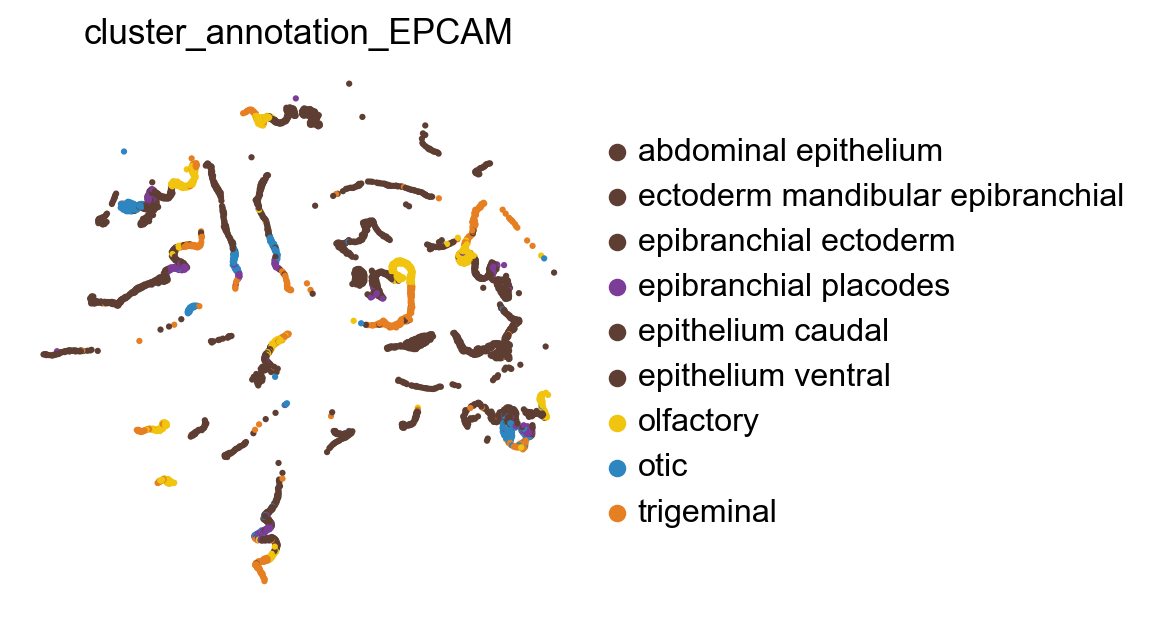

In [ ]:
sc.pl.embedding(
    subset,
    basis='X_spatial',
    color='cluster_annotation_EPCAM',
    palette=custom_palette,
    s=25,
    frameon=False,
    save='_placodes_epi__1.png'
)


/home/julia/miniconda3/envs/stlearn_Xenium/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


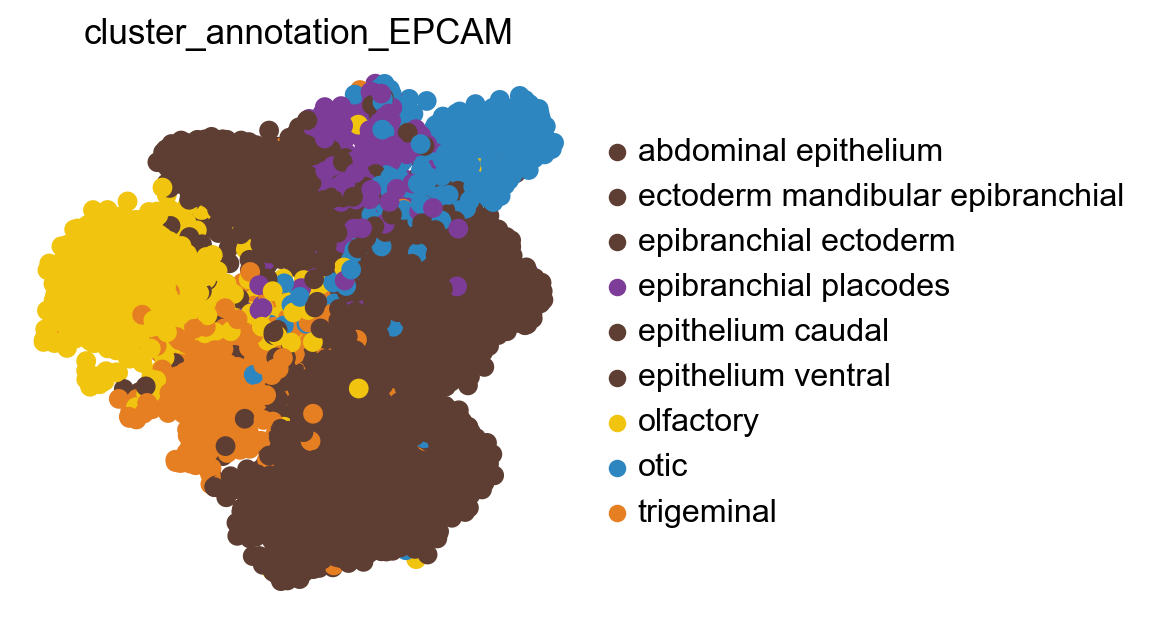

In [ ]:
sc.pl.umap(
    subset,
    color='cluster_annotation_EPCAM',
    #palette=highlight_colors,
    size=250,
    frameon=False, save='_placodes_epi_umap_1.png'
)
   # legend_loc='on data'



In [ ]:
subset1=subset.copy()

/home/julia/miniconda3/envs/stlearn_Xenium/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


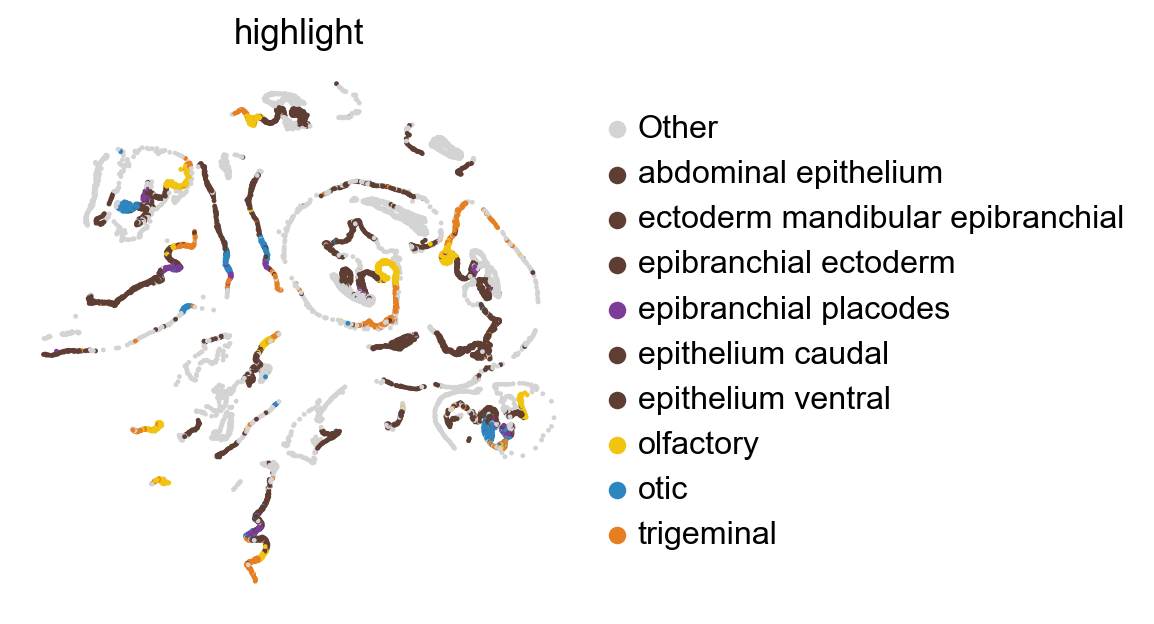

In [ ]:
adata1_ep.obs['highlight'] = 'Other'  # default

# Align indices and assign labels from subset
adata1_ep.obs.loc[subset1.obs_names, 'highlight'] = subset1.obs['cluster_annotation_EPCAM']

# Define color palette
highlight_colors = {
     'olfactory': '#f1c40f',  # yellow
    'trigeminal': '#e67e22',  # orange
   'ectoderm mandible epibranchial':'#5e3e33',
    'neural crest': '#4dd0e1',
   'epithelium body': '#5e3e33',
  'epithelium caudal': '#5e3e33',
'epibranchial placodes': '#7d3c98',
   'epibranchial ectoderm including placode cluster 18': '#5e3e33',
    'adenohypo placode': 'blue',
  'ectoderm abdominal': '#5e3e33',
    'otic': '#2e86c1',
    'abdominal epithelium': '#5e3e33',
    'ectoderm mandibular epibranchial': '#5e3e33','epithelium ventral': '#5e3e33',
    'epibranchial ectoderm': '#5e3e33',


    'Other': 'lightgray'
}

# Plot on full spatial embedding
sc.pl.embedding(
    adata1_ep,
    basis='X_spatial',
    color='highlight',
    palette=highlight_colors,
    s=15,save='_placodes_epi__EPCAM_.png',
    frameon=False
)


In [ ]:
subset1=subset.copy()

In [ ]:
subset1.obs.head(2)

cell_id   x_centroid   y_centroid  transcript_counts  \
1  8_5_region3_abdkbmja-1  1412.991333  1418.367676                 72   
2  8_5_region3_abdlihmb-1  1422.431763  1423.747437                 52   

   control_probe_counts  control_codeword_counts  unassigned_codeword_counts  \
1                     0                        0                           0   
2                     0                        0                           0   

   deprecated_codeword_counts  total_counts  cell_area  ...  \
1                           0          72.0  47.097970  ...   
2                           0          52.0  85.435628  ...   

   log1p_total_counts  pct_counts_in_top_10_genes  pct_counts_in_top_20_genes  \
1            4.290460                   55.555556                   76.388889   
2            3.970292                   51.923077                   76.923077   

  pct_counts_in_top_30_genes  pct_counts_in_top_40_genes  leiden  highlight  \
1                  90.277778                       100.0       4  Cluster 1   
2                  96.153846                       100.0       4  Cluster 1   

                                  cluster_annotation   Sclice  \
1  Surface ectoderm of the frontonasal region tru...  Slice_3   
2  Surface ectoderm of the frontonasal region tru...  Slice_3   

   cluster_annotation_EPCAM  
1                 olfactory  
2                 olfactory  

[2 rows x 26 columns]

In [ ]:
subset_table=subset1.obs[['cell_id', 'leiden']]
subset_table

cell_id leiden
1     8_5_region3_abdkbmja-1      4
2     8_5_region3_abdlihmb-1      4
3     8_5_region3_abdmiikp-1      3
4     8_5_region3_abdniphi-1      3
5     8_5_region3_abdonocd-1      3
...                      ...    ...
8233  8_5_region3_oinhkfdb-1      2
8234  8_5_region3_oinkfala-1      2
8235  8_5_region3_oinldhkd-1      2
8236  8_5_region3_oinmflpc-1      2
8237  8_5_region3_oinohcid-1      2

[4934 rows x 2 columns]

In [ ]:
# Remove '8_5_region1_' from cell_id
subset_table['cell_id'] = subset_table['cell_id'].str.replace('8_5_region3_', '', regex=False)

# Display the result
subset_table.head()


<ipython-input-27-7ba19548e707>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_table['cell_id'] = subset_table['cell_id'].str.replace('8_5_region3_', '', regex=False)


cell_id leiden
1  abdkbmja-1      4
2  abdlihmb-1      4
3  abdmiikp-1      3
4  abdniphi-1      3
5  abdonocd-1      3

In [ ]:
# Rename a single column
subset_table.rename(columns={'leiden': 'group'}, inplace=True)


<ipython-input-28-c334f300198b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_table.rename(columns={'leiden': 'group'}, inplace=True)


In [ ]:
subset_table.to_csv('All_placodes__SLICE3__EPIthelium__07_07_2024_.csv', index=False)


In [ ]:
sc.settings.set_figure_params(dpi=90)

/home/julia/miniconda3/envs/stlearn_Xenium/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/julia/miniconda3/envs/stlearn_Xenium/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


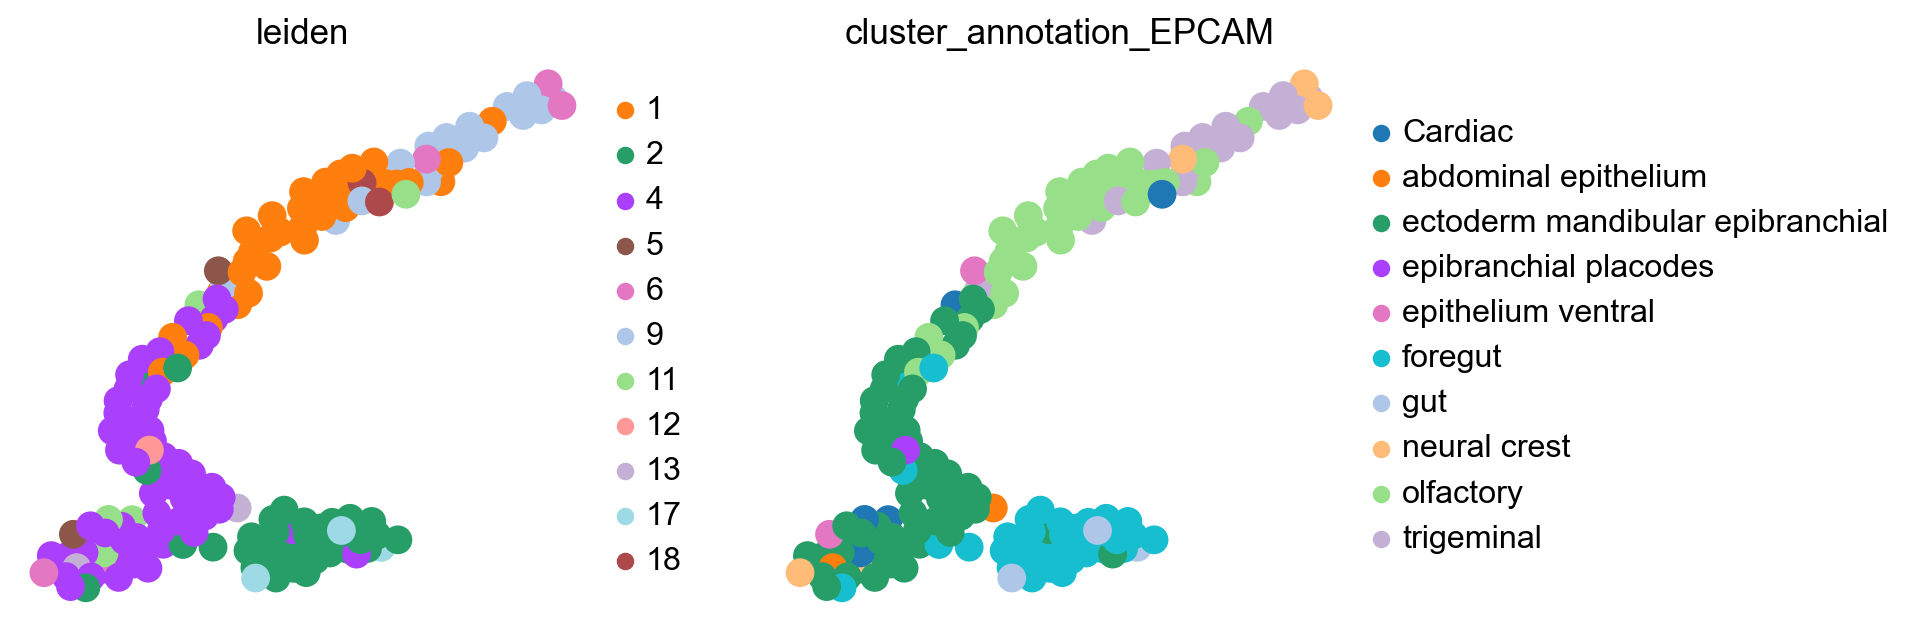

In [ ]:
df = pd.read_csv("/home/julia/Xenioum/Heat_maps__Xenium/3__8_4/placodes_skin/pl_skin1.csv", sep=";")
df
df_cleaned = df.iloc[2:].reset_index(drop=True)
# Rename the column
df_cleaned.columns = ["raw"]
# Split by comma into multiple columns
df_split = df_cleaned["raw"].str.split(",", expand=True)
df_split
df_split.columns = ["Cell ID", "Cluster", "Transcripts", "Area (µm^2)"]
df_split
barcodes=df_split['Cell ID'].to_list()
#barcodes

barcodes_prefixed6 = ['8_5_region3_'+bc for bc in barcodes]
#barcodes_prefixed5
subset_filtered6 = adata1_ep[adata1_ep.obs['cell_id'].isin(barcodes_prefixed6)].copy()
subset_filtered6

#Otic
sc.pl.embedding(subset_filtered6, basis="X_spatial", color=['leiden','cluster_annotation_EPCAM'], frameon=False, s=530,)



In [ ]:
subset_filtered6.obs['cluster_annotation_EPCAM'].unique().tolist()

['ectoderm mandibular epibranchial',
 'foregut',
 'neural crest',
 'Cardiac',
 'abdominal epithelium',
 'gut',
 'trigeminal',
 'olfactory',
 'epithelium ventral',
 'epibranchial placodes']

/home/julia/miniconda3/envs/stlearn_Xenium/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


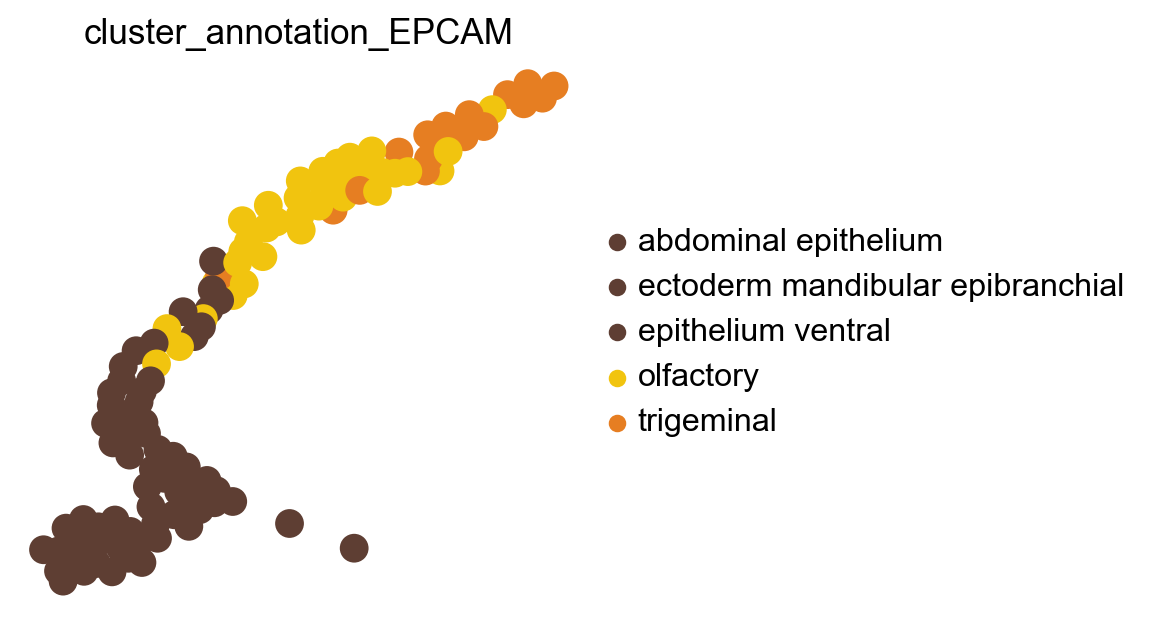

In [ ]:
# Define the clusters you want
selected_clusters = [  'trigeminal', 'ectoderm mandibular epibranchial',
'abdominal epithelium',
 'olfactory',
 'epithelium ventral',
]

# Subset the AnnData object
subset_nc_trigeminal5= subset_filtered6[subset_filtered6.obs['cluster_annotation_EPCAM'].isin(selected_clusters)].copy()


# Define custom color palette
highlight_colors = {
      'olfactory': '#f1c40f',  # yellow
    'trigeminal': '#e67e22',  # orange
   'ectoderm mandible epibranchial':'#5e3e33',
    'neural crest': '#4dd0e1',
   'epithelium body': '#5e3e33',
  'epithelium caudal': '#5e3e33',
'epibranchial placodes': '#7d3c98',
   'epibranchial ectoderm including placode cluster 18': '#5e3e33',
    'adenohypo placode': 'blue',
  'ectoderm abdominal': '#5e3e33',
    'otic': '#2e86c1',
    'abdominal epithelium': '#5e3e33',
    'ectoderm mandibular epibranchial': '#5e3e33','epithelium ventral': '#5e3e33',
    'epibranchial ectoderm': '#5e3e33',
 'Other': 'lightgray'
}

# Plot with custom colors
sc.pl.embedding(
    subset_nc_trigeminal5,
    basis='X_spatial',
    color='cluster_annotation_EPCAM',
    palette=highlight_colors,
    frameon=False,
    s=530, save='_olfact_trigem_1__UMAP.png'
)


In [ ]:
adata3=subset_filtered6.copy()
adata3.obs.head(2)

cell_id   x_centroid   y_centroid  transcript_counts  \
2625  8_5_region3_enkcjomc-1  2269.615234  1893.960083                 71   
2626  8_5_region3_enkdjnpk-1  2263.227295  1879.868042                 89   

      control_probe_counts  control_codeword_counts  \
2625                     0                        0   
2626                     0                        0   

      unassigned_codeword_counts  deprecated_codeword_counts  total_counts  \
2625                           0                           0          71.0   
2626                           0                           0          89.0   

      cell_area  ...  log1p_total_counts  pct_counts_in_top_10_genes  \
2625  64.708909  ...            4.276666                   56.338028   
2626  98.982504  ...            4.499810                   48.314607   

      pct_counts_in_top_20_genes pct_counts_in_top_30_genes  \
2625                   77.464789                  91.549296   
2626                   70.786517                  82.022472   

      pct_counts_in_top_40_genes  leiden                         highlight  \
2625                  100.000000       4  ectoderm mandibular epibranchial   
2626                   93.258427       4  ectoderm mandibular epibranchial   

                                     cluster_annotation   Sclice  \
2625                 Foregut true (Nkx2-3, Epcam, Pax9)  Slice_3   
2626  Placodes posterior branchial arch ectoderm tru...  Slice_3   

              cluster_annotation_EPCAM  
2625  ectoderm mandibular epibranchial  
2626  ectoderm mandibular epibranchial  

[2 rows x 26 columns]

In [ ]:
subset_nc_trigeminal5.obs.head(3)

cell_id   x_centroid   y_centroid  transcript_counts  \
2625  8_5_region3_enkcjomc-1  2269.615234  1893.960083                 71   
2626  8_5_region3_enkdjnpk-1  2263.227295  1879.868042                 89   
2627  8_5_region3_enkeboii-1  2262.222168  1891.958374                 52   

      control_probe_counts  control_codeword_counts  \
2625                     0                        0   
2626                     0                        0   
2627                     0                        0   

      unassigned_codeword_counts  deprecated_codeword_counts  total_counts  \
2625                           0                           0          71.0   
2626                           0                           0          89.0   
2627                           0                           0          52.0   

      cell_area  ...  log1p_total_counts  pct_counts_in_top_10_genes  \
2625  64.708909  ...            4.276666                   56.338028   
2626  98.982504  ...            4.499810                   48.314607   
2627  40.234220  ...            3.970292                   63.461538   

      pct_counts_in_top_20_genes pct_counts_in_top_30_genes  \
2625                   77.464789                  91.549296   
2626                   70.786517                  82.022472   
2627                   84.615385                 100.000000   

      pct_counts_in_top_40_genes  leiden                         highlight  \
2625                  100.000000       4  ectoderm mandibular epibranchial   
2626                   93.258427       4  ectoderm mandibular epibranchial   
2627                  100.000000       4  ectoderm mandibular epibranchial   

                                     cluster_annotation   Sclice  \
2625                 Foregut true (Nkx2-3, Epcam, Pax9)  Slice_3   
2626  Placodes posterior branchial arch ectoderm tru...  Slice_3   
2627                 Foregut true (Nkx2-3, Epcam, Pax9)  Slice_3   

              cluster_annotation_EPCAM  
2625  ectoderm mandibular epibranchial  
2626  ectoderm mandibular epibranchial  
2627  ectoderm mandibular epibranchial  

[3 rows x 26 columns]

In [ ]:
# Define the clusters you want
selected_clusters = ['neural crest','olfactory', 'trigeminal']

# Subset the AnnData object
subset_olfactory_trigeminal1 = adata3[adata3.obs['cluster_annotation_EPCAM'].isin(selected_clusters)].copy()


/home/julia/miniconda3/envs/stlearn_Xenium/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


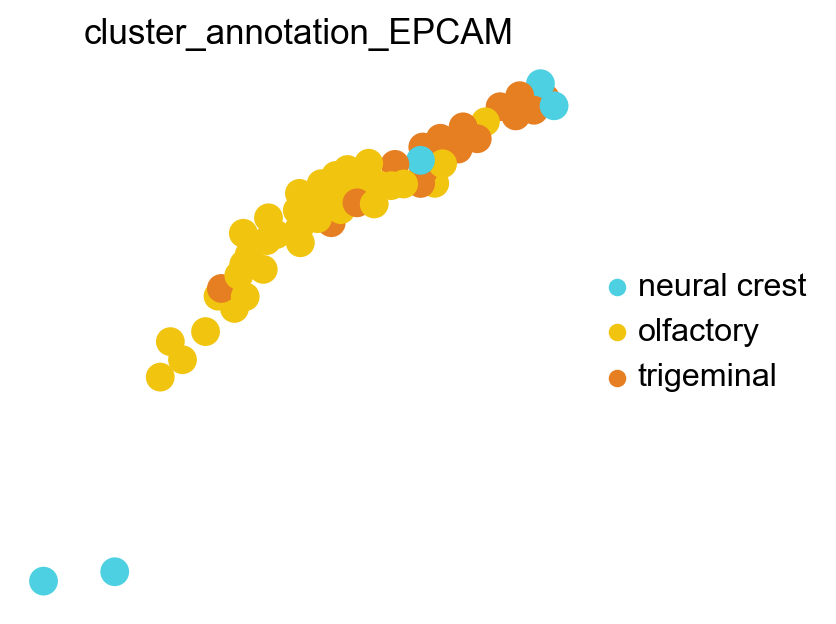

In [ ]:
# Define the clusters you want
selected_clusters = ['neural crest','olfactory', 'trigeminal']

# Subset the AnnData object
subset_olfactory_trigeminal1 = adata3[adata3.obs['cluster_annotation_EPCAM'].isin(selected_clusters)].copy()


# Define custom color palette
highlight_colors = {
    'olfactory': '#f1c40f',     # yellow
    'trigeminal': '#e67e22',    # orange
    'neural crest': '#4dd0e1',
    'epibrachial placode': '#7d3c98',
    'adenohypo placode': 'blue',
    'otic': '#2e86c1',
    'Other': 'lightgray'
}

# Plot with custom colors
sc.pl.embedding(
    subset_olfactory_trigeminal1,
    basis='X_spatial',
    color='cluster_annotation_EPCAM',
    palette=highlight_colors,
    frameon=False,
    s=530,# save='_Olfact_trigem_leiden_1.png'
)


In [ ]:
adata3=subset_nc_trigeminal5.copy()

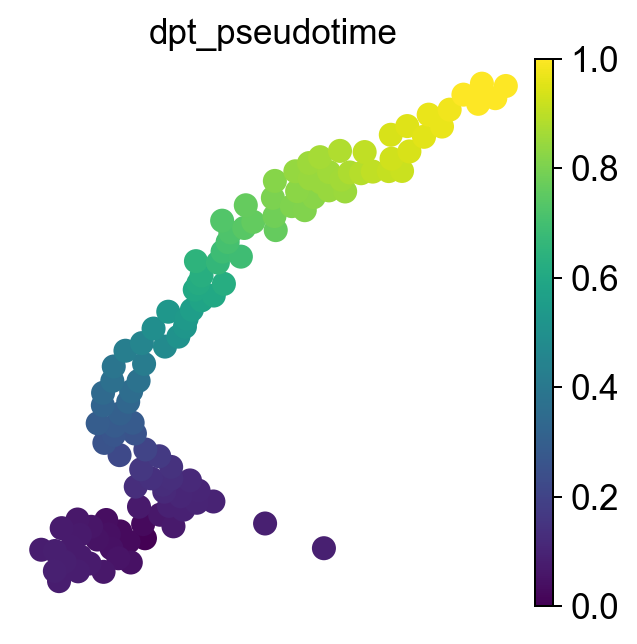

In [ ]:
# Define barcode
root_cell_barcode = '8_5_region3_enkcjomc-1'

# Find the row index (row label) corresponding to the barcode in the cell_id column
if 'cell_id' in adata3.obs.columns:
    match = adata3.obs[adata3.obs['cell_id'] == root_cell_barcode]
    if not match.empty:
        root_index_label = match.index[0]  # row label
        root_index = adata3.obs.index.get_loc(root_index_label)  # integer position
        adata3.uns['iroot'] = root_index
    else:
        raise ValueError("Barcode not found in adata.obs['cell_id']")
else:
    raise ValueError("No 'cell_id' column in adata.obs")

  # Use spatial embedding to compute pseudotime
sc.pp.neighbors(adata3, use_rep="X_spatial", n_neighbors=15)
sc.tl.dpt(adata3)

# Plot
sc.pl.embedding(
    adata3,
    basis="X_spatial",
    color="dpt_pseudotime",
    cmap="viridis",
    s=370, frameon=False,
    #title="Spatial Pseudotime (Root from Barcode)", frameon=False,
    save='_olfact_trigem_1__.svg'
)



In [ ]:
adata=adata3.copy()

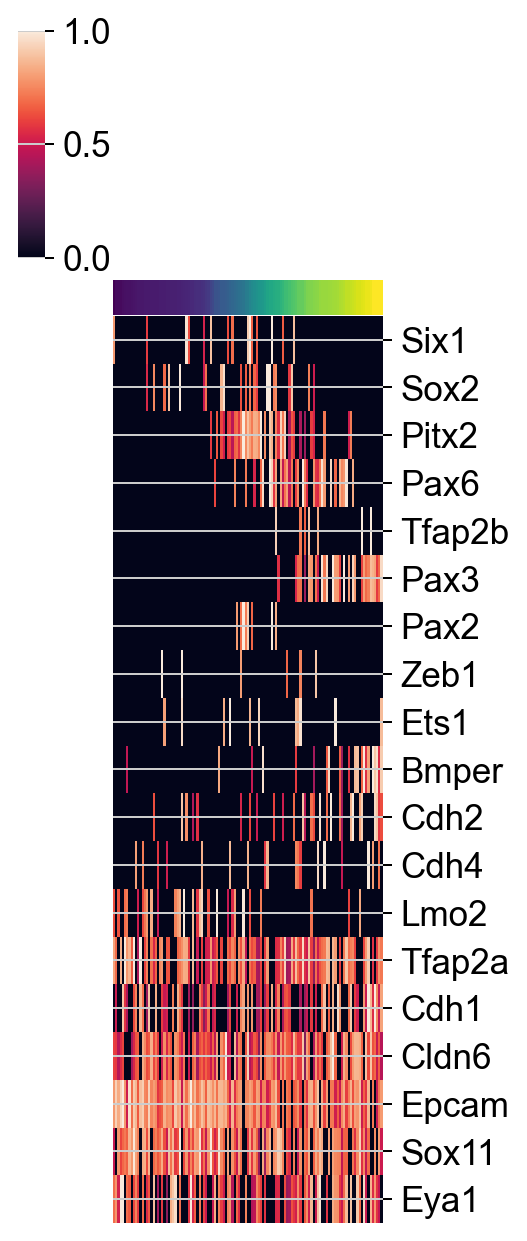

In [ ]:
genes_all = [  'Six1',   'Sox2','Pitx2',  'Pax6',    "Tfap2b",'Pax3','Pax2', 'Zeb1',  'Ets1','Bmper',  "Cdh2", "Cdh4",  'Lmo2',"Tfap2a", "Cdh1", "Cldn6", "Epcam", "Sox11", "Eya1" ]

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib import cm

# 1. Remove duplicates and keep only genes present in data
genes_all = list(dict.fromkeys(genes_all))
genes_exist = [g for g in genes_all if g in adata.var_names]

# 2. Sort cells by pseudotime
adata_sorted = adata[adata.obs.sort_values("dpt_pseudotime").index, :]

# 3. Extract expression matrix
expr = adata_sorted[:, genes_exist].X
if not isinstance(expr, np.ndarray):
    expr = expr.toarray()

# 4. Percentile scaling (1st to 99th)
p1 = np.percentile(expr, 1, axis=0)
p99 = np.percentile(expr, 99, axis=0)
expr_scaled = np.clip((expr - p1) / (p99 - p1 + 1e-8), 0, 1)

# 5. Create DataFrame
expr_df = pd.DataFrame(expr_scaled, columns=genes_exist)

# Optional: manually reorder genes
manual_order = [g for g in genes_all if g in expr_df.columns]
expr_df_sorted = expr_df[manual_order]

# 6. Get pseudotime colors
pseudotime_values = adata_sorted.obs['dpt_pseudotime'].values
norm = Normalize(vmin=pseudotime_values.min(), vmax=pseudotime_values.max())
pseudotime_colors = cm.viridis(norm(pseudotime_values))

# 7. Plot and save heatmap
g = sns.clustermap(
    expr_df_sorted.T,
    col_colors=pseudotime_colors,
    row_cluster=False,
    col_cluster=False,
   # cmap="magma",
    xticklabels=False,
    yticklabels=True,
    figsize=(3, 7),
)

# Save to SVG
g.savefig("_olfact_trigem_1__.svg")

/home/julia/miniconda3/envs/stlearn_Xenium/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/julia/miniconda3/envs/stlearn_Xenium/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


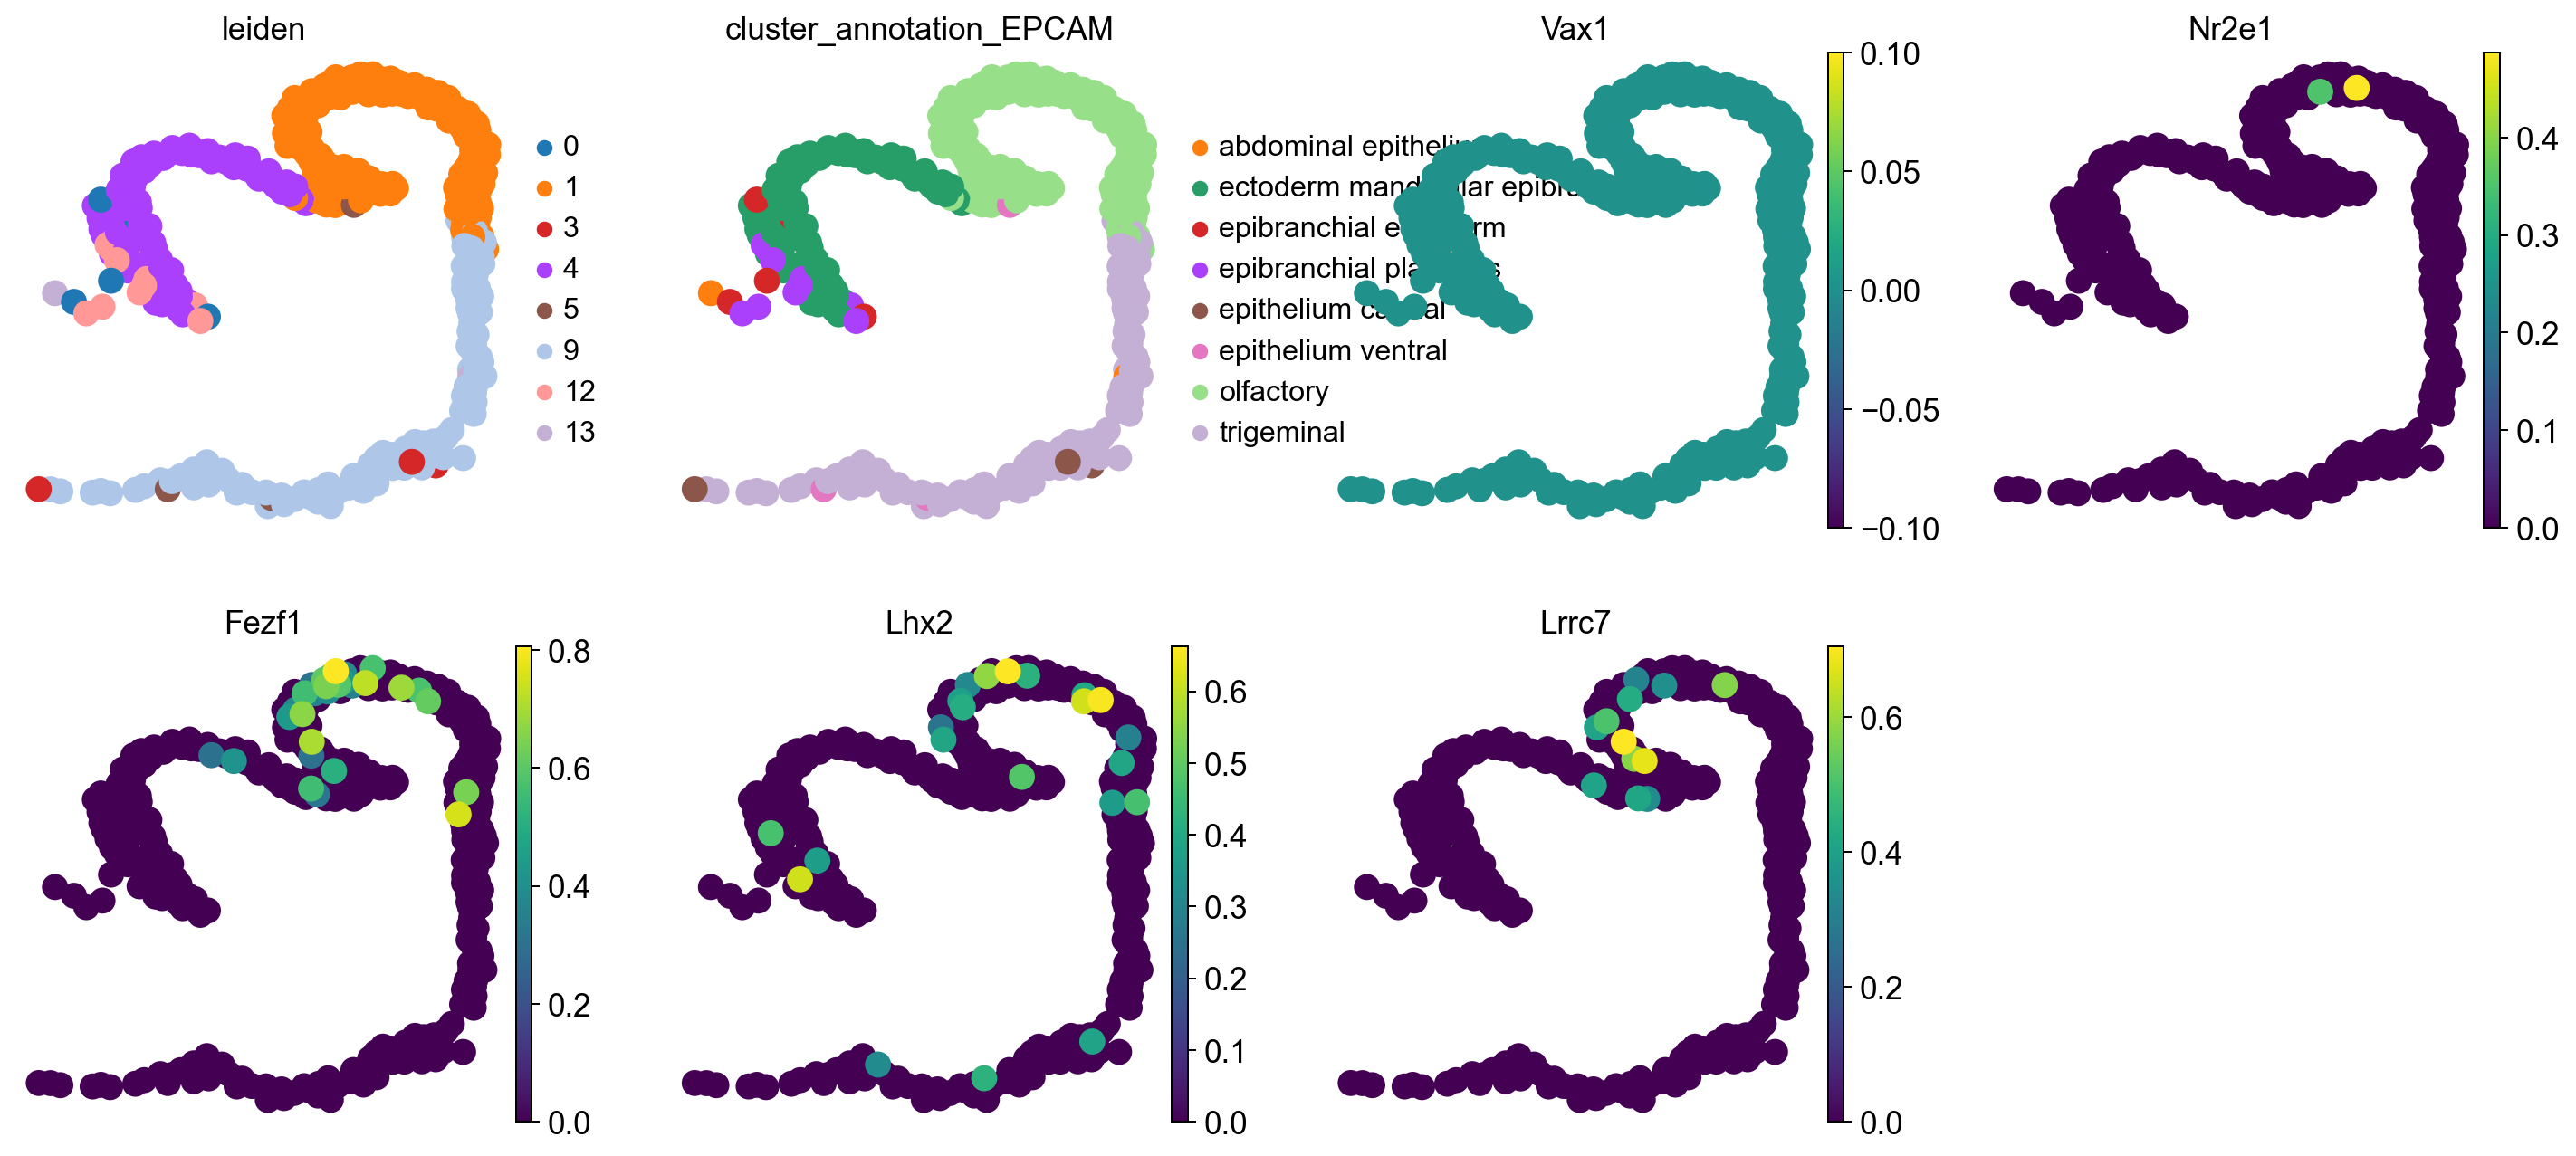

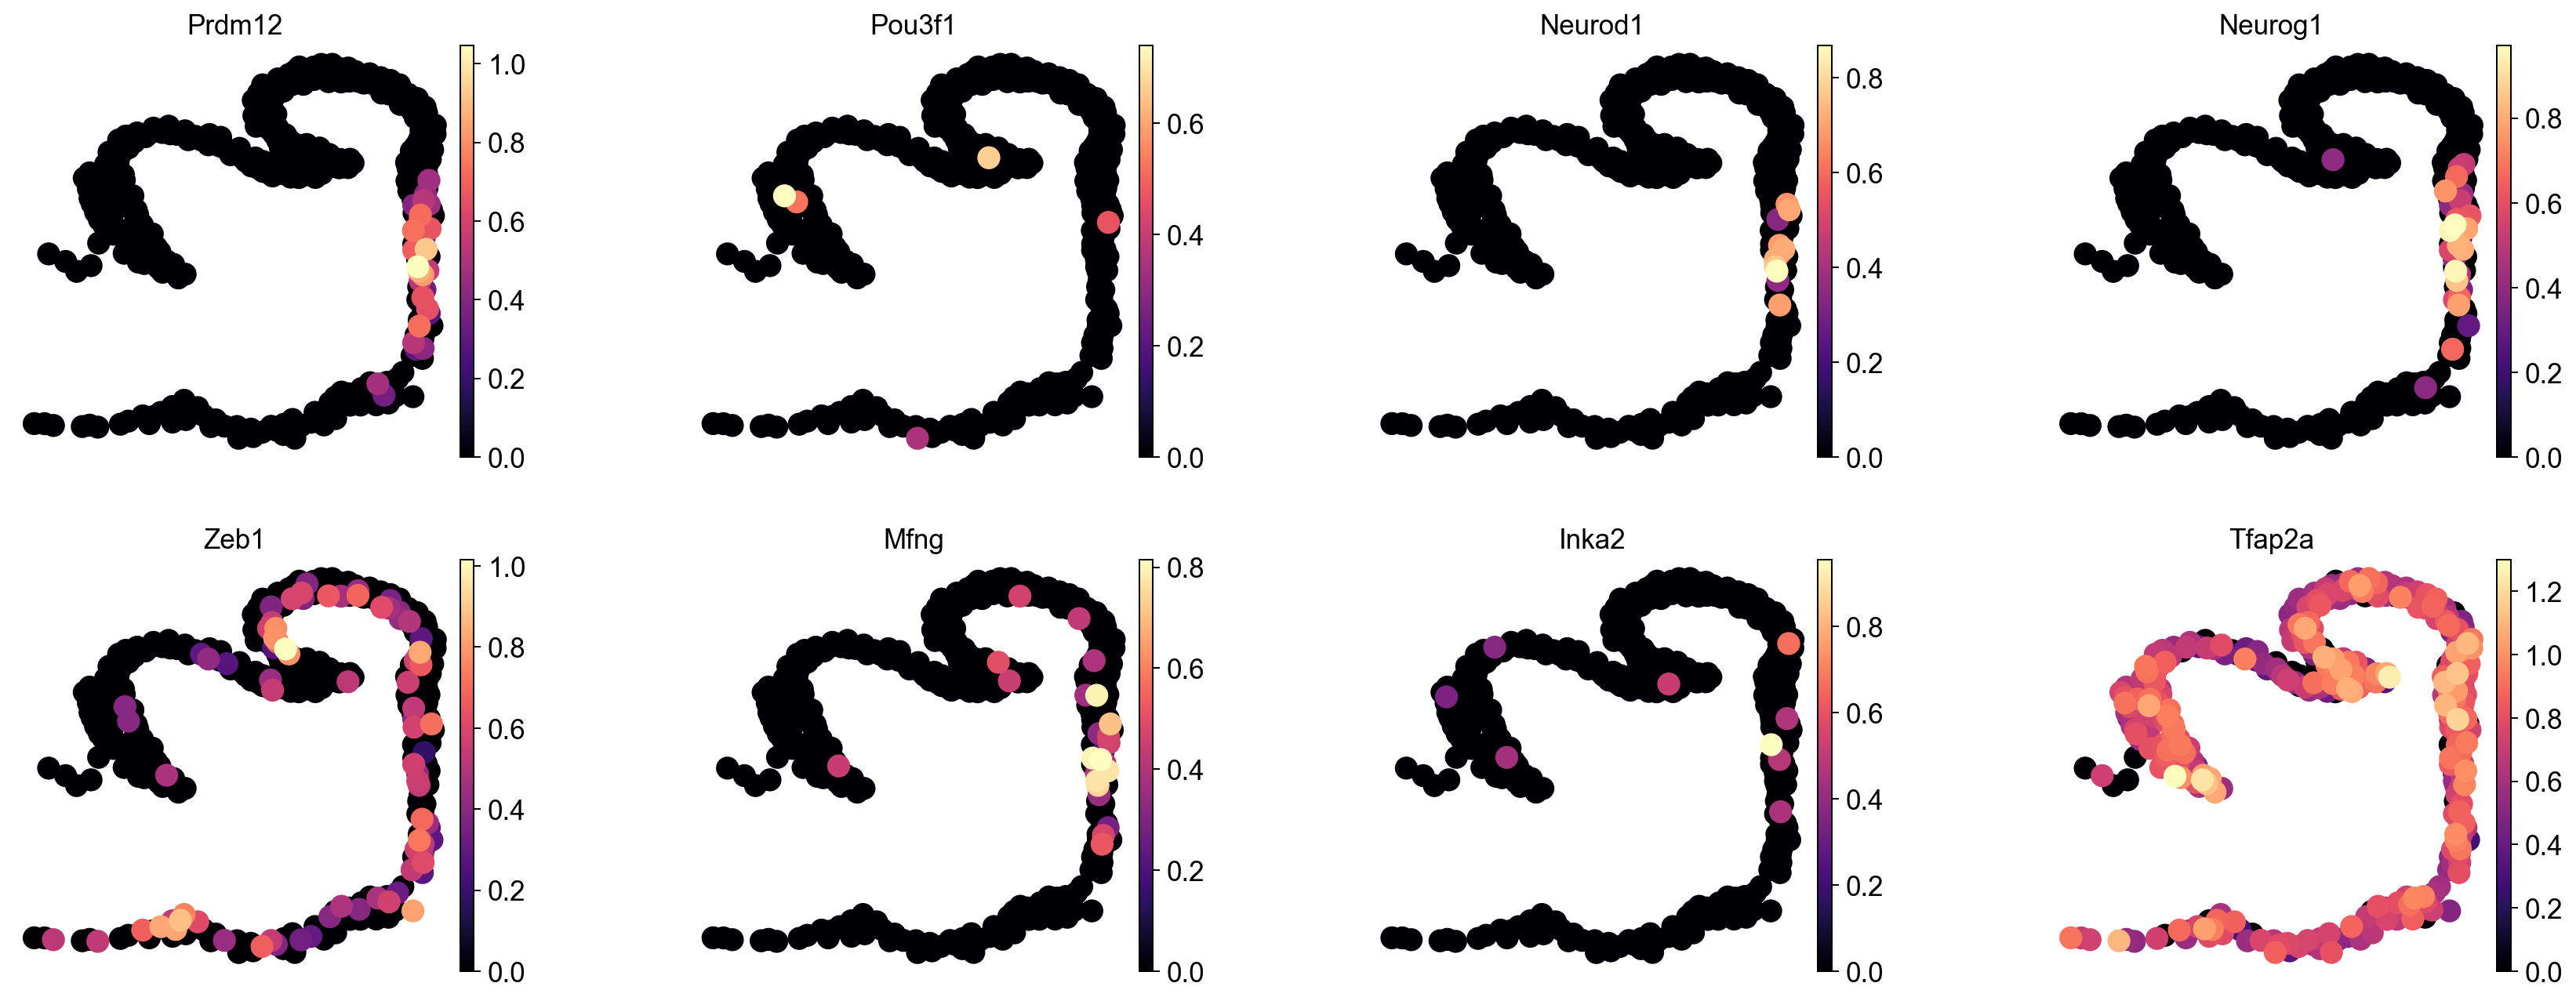

In [ ]:
df = pd.read_csv("/home/julia/Xenioum/Heat_maps__Xenium/3__8_4/placodes_skin/pl_skin3.csv", sep=";")
df
df_cleaned = df.iloc[2:].reset_index(drop=True)
# Rename the column
df_cleaned.columns = ["raw"]
# Split by comma into multiple columns
df_split = df_cleaned["raw"].str.split(",", expand=True)
df_split
df_split.columns = ["Cell ID", "Cluster", "Transcripts", "Area (µm^2)"]
df_split
barcodes=df_split['Cell ID'].to_list()
#barcodes

barcodes_prefixed6 = ['8_5_region3_'+bc for bc in barcodes]
#barcodes_prefixed5
subset_filtered6 = adata1_ep[adata1_ep.obs['cell_id'].isin(barcodes_prefixed6)].copy()
subset_filtered6

#Otic
sc.pl.embedding(subset_filtered6, basis="X_spatial", color=['leiden','cluster_annotation_EPCAM', 'Vax1', 'Nr2e1', 'Fezf1', 'Lhx2', 'Lrrc7',], frameon=False, s=530,)

# Trigeminal
sc.pl.embedding(subset_filtered6, basis="X_spatial", color=[   'Prdm12' , 'Pou3f1', 'Neurod1', 'Neurog1', 'Zeb1', 'Mfng', 'Inka2', 'Tfap2a'],
           legend_loc='on data', wspace=0.4, frameon=False, size=550, color_map='magma')

In [ ]:
subset_filtered6.obs['cluster_annotation_EPCAM'].unique().tolist()

['trigeminal',
 'epithelium ventral',
 'epithelium caudal',
 'abdominal epithelium',
 'ectoderm mandibular epibranchial',
 'olfactory',
 'epibranchial placodes',
 'epibranchial ectoderm']

/home/julia/miniconda3/envs/stlearn_Xenium/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


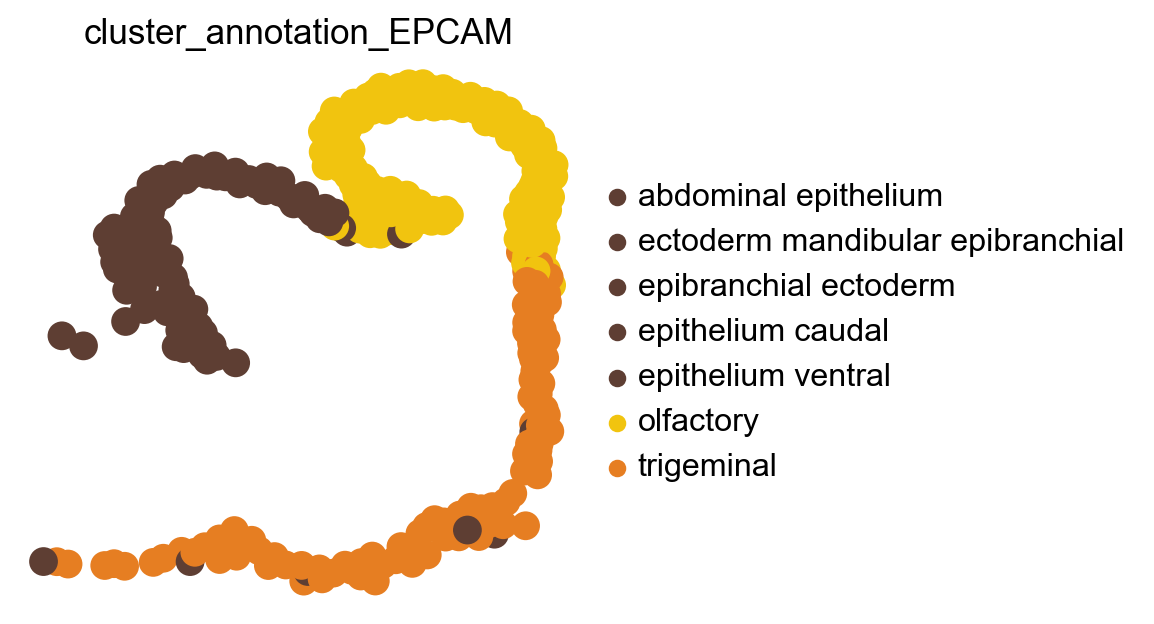

In [ ]:
#subset_filtered6.obs['cluster_annotation_EPCAM'].unique().tolist()

# Define the clusters you want
selected_clusters = ['trigeminal',
 'epithelium ventral',
 'epithelium caudal',
 'abdominal epithelium',
 'ectoderm mandibular epibranchial',
 'olfactory',

 'epibranchial ectoderm']

# Subset the AnnData object
subset_nc_trigeminal5= subset_filtered6[subset_filtered6.obs['cluster_annotation_EPCAM'].isin(selected_clusters)].copy()


# Define custom color palette
highlight_colors = {
      'olfactory': '#f1c40f',  # yellow
    'trigeminal': '#e67e22',  # orange
   'ectoderm mandible epibranchial':'#5e3e33',
    'neural crest': '#4dd0e1',
   'epithelium body': '#5e3e33',
  'epithelium caudal': '#5e3e33',
'epibranchial placodes': '#7d3c98',
   'epibranchial ectoderm including placode cluster 18': '#5e3e33',
    'adenohypo placode': 'blue',
  'ectoderm abdominal': '#5e3e33',
    'otic': '#2e86c1',
    'abdominal epithelium': '#5e3e33',
    'ectoderm mandibular epibranchial': '#5e3e33','epithelium ventral': '#5e3e33',
    'epibranchial ectoderm': '#5e3e33',

    'Other': 'lightgray'
}

# Plot with custom colors
sc.pl.embedding(
    subset_nc_trigeminal5,
    basis='X_spatial',
    color='cluster_annotation_EPCAM',
    palette=highlight_colors,
    frameon=False,
    s=530, #save='_NC_trigeminal__UMAP.png'
)


In [ ]:
subset_nc_trigeminal5.obs.head()


cell_id   x_centroid   y_centroid  transcript_counts  \
3477  8_5_region3_gofdjcna-1  3143.578125  2231.645264                109   
3478  8_5_region3_gofecdgg-1  3169.695801  2231.270020                136   
3479  8_5_region3_goffahif-1  3165.464600  2221.950195                149   
3480  8_5_region3_goffogcn-1  3158.973145  2237.430420                192   
3481  8_5_region3_gofifdbd-1  3154.027832  2248.199463                181   

      control_probe_counts  control_codeword_counts  \
3477                     0                        0   
3478                     0                        0   
3479                     0                        0   
3480                     0                        0   
3481                     0                        0   

      unassigned_codeword_counts  deprecated_codeword_counts  total_counts  \
3477                           0                           0         109.0   
3478                           0                           0         136.0   
3479                           0                           0         149.0   
3480                           1                           0         192.0   
3481                           0                           0         181.0   

       cell_area  ...  log1p_total_counts  pct_counts_in_top_10_genes  \
3477  126.482661  ...            4.700480                   46.788991   
3478   96.498910  ...            4.919981                   34.558824   
3479  174.935319  ...            5.010635                   47.651007   
3480  166.400787  ...            5.262690                   47.395833   
3481  136.778286  ...            5.204007                   42.541436   

      pct_counts_in_top_20_genes pct_counts_in_top_30_genes  \
3477                   70.642202                  83.486239   
3478                   56.617647                  71.323529   
3479                   70.469799                  83.892617   
3480                   69.791667                  81.250000   
3481                   67.403315                  80.662983   

      pct_counts_in_top_40_genes  leiden   highlight  \
3477                   92.660550       9  trigeminal   
3478                   80.882353       9  trigeminal   
3479                   91.946309       9  trigeminal   
3480                   89.583333       9  trigeminal   
3481                   90.607735       9  trigeminal   

                                     cluster_annotation   Sclice  \
3477  Surface ectoderm of the frontonasal region tru...  Slice_3   
3478  Surface ectoderm of the frontonasal region tru...  Slice_3   
3479  Surface ectoderm of the frontonasal region tru...  Slice_3   
3480                     Ectoderm surface all body true  Slice_3   
3481  Surface ectoderm of the frontonasal region tru...  Slice_3   

      cluster_annotation_EPCAM  
3477                trigeminal  
3478                trigeminal  
3479                trigeminal  
3480                trigeminal  
3481                trigeminal  

[5 rows x 26 columns]

In [ ]:
subset=subset_nc_trigeminal5.copy()

In [ ]:
sc.pp.pca(subset)
sc.pp.neighbors(subset, use_rep='X_pca')
sc.tl.diffmap(subset)
# Select one cell from the 'neural crest' cluster to use as root
neural_crest_cells = subset.obs_names[subset.obs['cluster_annotation_EPCAM'] == 'trigeminal']

#neural_crest_cells = subset.obs_names[subset.obs['cluster_annotation_EPCAM'] == 'olfactory']
root_cell = neural_crest_cells[0]  # pick the first one, or use a more specific one if you like

# Set root cell index
subset.uns['iroot'] = subset.obs_names.get_loc(root_cell)

sc.tl.dpt(subset)


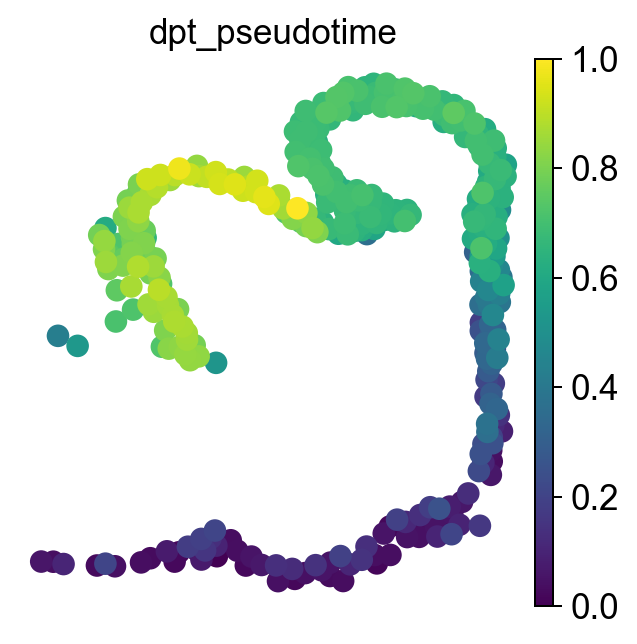

In [ ]:
sc.pl.embedding(subset, basis='X_spatial', color='dpt_pseudotime', frameon=False)
#sc.pl.embedding(subset, basis='diffmap', color='dpt_pseudotime')


In [ ]:
adata3=subset.copy()

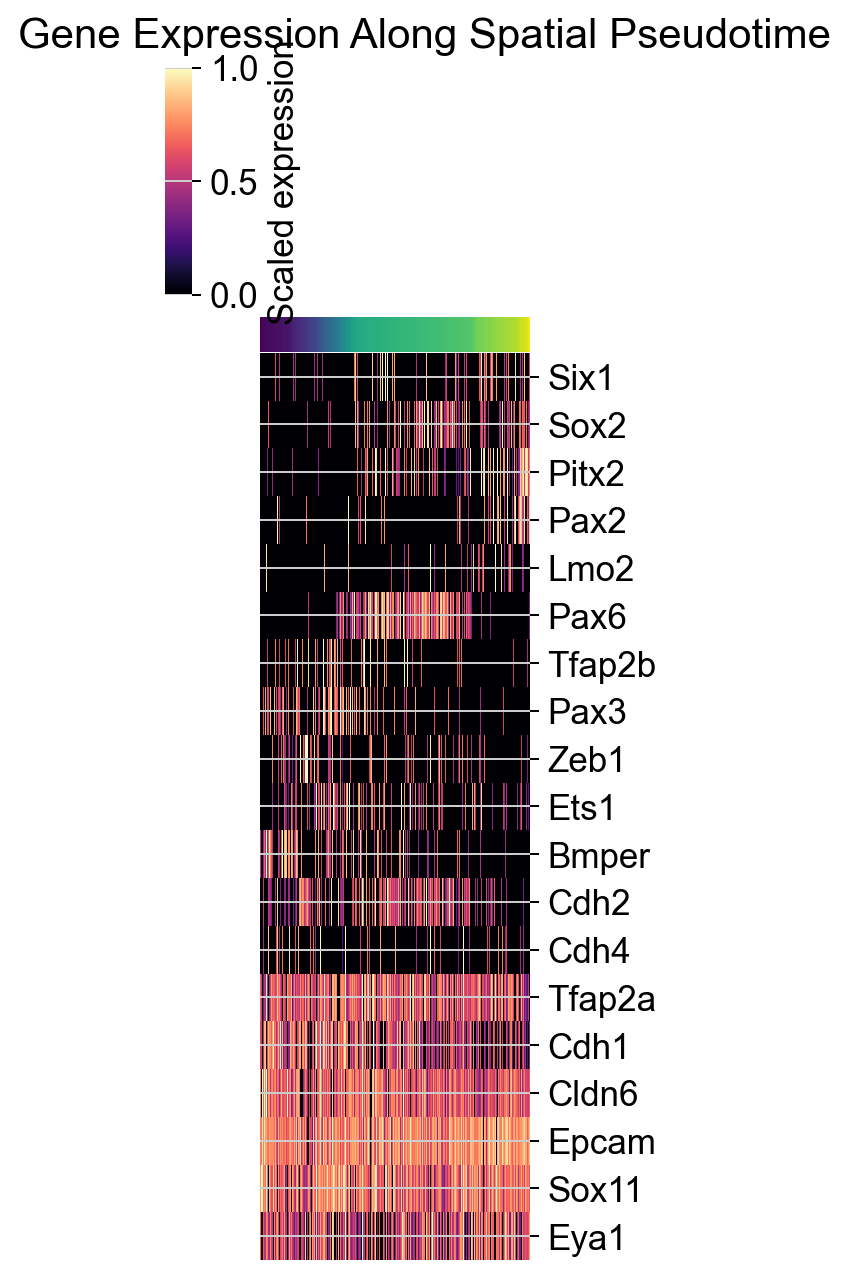

In [ ]:
genes_all = [  'Six1',   'Sox2','Pitx2','Pax2', 'Lmo2', 'Pax6',    "Tfap2b",'Pax3', 'Zeb1',  'Ets1','Bmper',  "Cdh2", "Cdh4",  "Tfap2a", "Cdh1", "Cldn6", "Epcam", "Sox11", "Eya1" ]



import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib import cm

# 1. Remove duplicates and keep only genes present in data
genes_all = list(dict.fromkeys(genes_all))
genes_exist = [g for g in genes_all if g in adata3.var_names]

# 2. Sort cells by pseudotime
adata_sorted = adata3[adata3.obs.sort_values("dpt_pseudotime").index, :]

# 3. Extract expression matrix
expr = adata_sorted[:, genes_exist].X
if not isinstance(expr, np.ndarray):
    expr = expr.toarray()

# 4. Percentile scaling (1st to 99th)
p1 = np.percentile(expr, 1, axis=0)
p99 = np.percentile(expr, 99, axis=0)
expr_scaled = np.clip((expr - p1) / (p99 - p1 + 1e-8), 0, 1)

# 5. Create DataFrame
expr_df = pd.DataFrame(expr_scaled, columns=genes_exist)

# Optional: manually reorder genes
manual_order = [g for g in genes_all if g in expr_df.columns]
expr_df_sorted = expr_df[manual_order]

# 6. Get pseudotime colors
pseudotime_values = adata_sorted.obs['dpt_pseudotime'].values
norm = Normalize(vmin=pseudotime_values.min(), vmax=pseudotime_values.max())
pseudotime_colors = cm.viridis(norm(pseudotime_values))

# 7. Plot heatmap
sns.clustermap(
    expr_df_sorted.T,
    col_colors=pseudotime_colors,
    row_cluster=False,
    col_cluster=False,
    cmap="magma",
    xticklabels=False,
    yticklabels=True,
    figsize=(3,7),
    cbar_kws={"label": "Scaled expression"}
)

plt.suptitle("Gene Expression Along Spatial Pseudotime", y=1.02)
plt.show()

/home/julia/miniconda3/envs/stlearn_Xenium/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/julia/miniconda3/envs/stlearn_Xenium/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


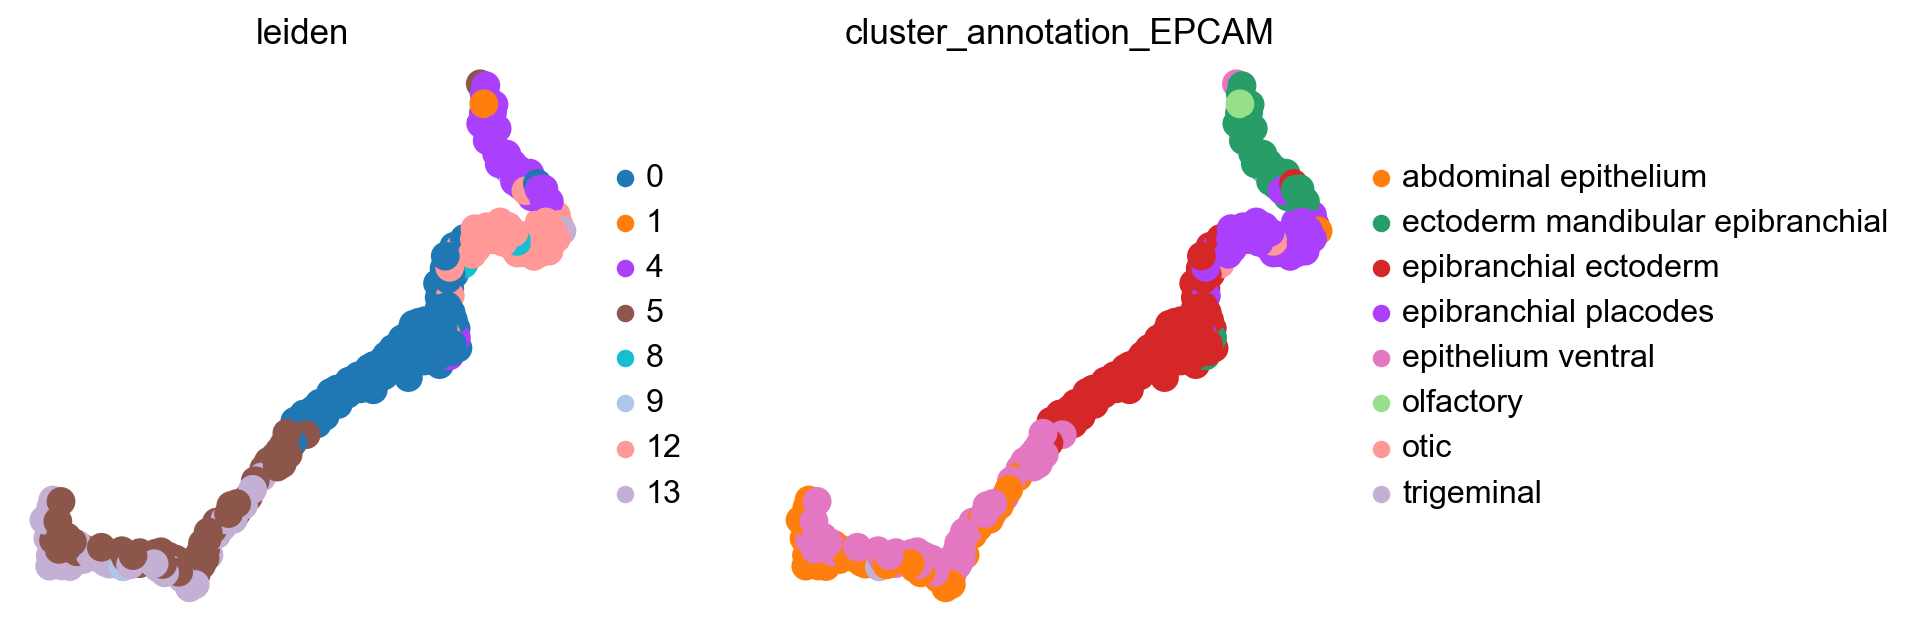

In [ ]:
df = pd.read_csv("/home/julia/Xenioum/Heat_maps__Xenium/3__8_4/placodes_skin/Selection_20_cells_stats.csv", sep=";")
df
df_cleaned = df.iloc[2:].reset_index(drop=True)
# Rename the column
df_cleaned.columns = ["raw"]
# Split by comma into multiple columns
df_split = df_cleaned["raw"].str.split(",", expand=True)
df_split
df_split.columns = ["Cell ID", "Cluster", "Transcripts", "Area (µm^2)"]
df_split
barcodes=df_split['Cell ID'].to_list()
#barcodes

barcodes_prefixed6 = ['8_5_region3_'+bc for bc in barcodes]
#barcodes_prefixed5
subset_filtered6 = adata1_ep[adata1_ep.obs['cell_id'].isin(barcodes_prefixed6)].copy()
subset_filtered6

#Otic
sc.pl.embedding(subset_filtered6, basis="X_spatial", color=['leiden','cluster_annotation_EPCAM',], frameon=False, s=530,)



In [ ]:
subset_filtered6.obs['cluster_annotation_EPCAM'].unique().tolist()

['epibranchial ectoderm',
 'epithelium ventral',
 'abdominal epithelium',
 'ectoderm mandibular epibranchial',
 'epibranchial placodes',
 'otic',
 'trigeminal',
 'olfactory']

/home/julia/miniconda3/envs/stlearn_Xenium/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


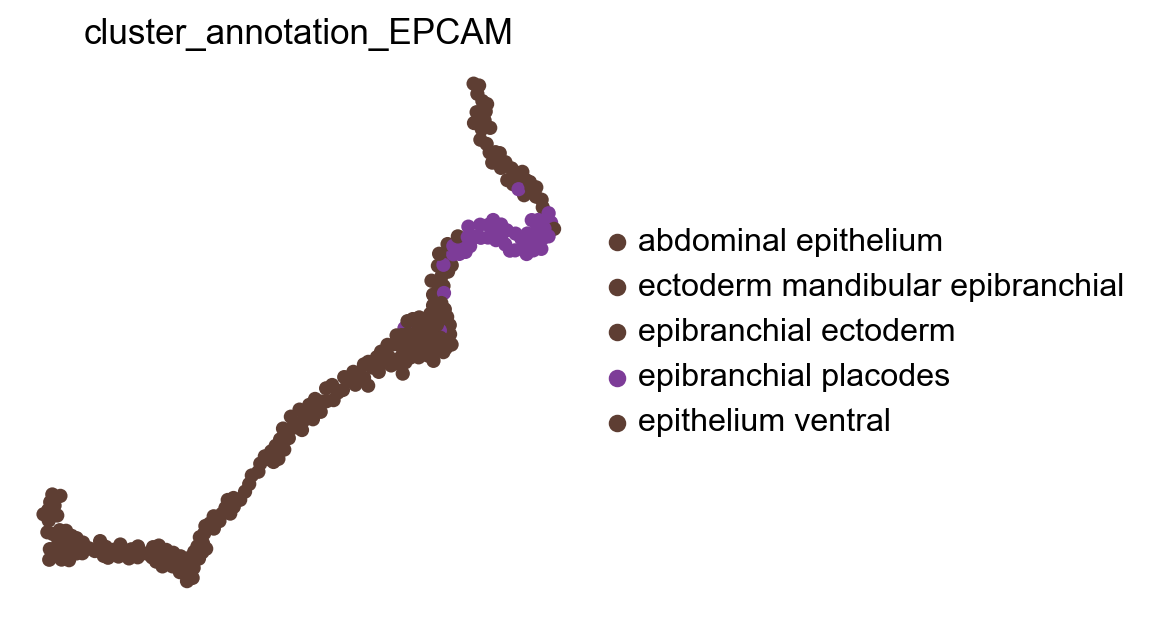

In [ ]:

selected_clusters =['epibranchial ectoderm',
 'epithelium ventral',
 'abdominal epithelium',
 'ectoderm mandibular epibranchial',
 'epibranchial placodes',
 'epithelium caudal']

# Subset the AnnData object
subset_nc_trigeminal5= subset_filtered6[subset_filtered6.obs['cluster_annotation_EPCAM'].isin(selected_clusters)].copy()


# Define custom color palette
highlight_colors = {
      'olfactory': '#f1c40f',  # yellow
    'trigeminal': '#e67e22',  # orange
   'ectoderm mandible epibranchial':'#5e3e33',
    'neural crest': '#4dd0e1',
   'epithelium body': '#5e3e33',
  'epithelium caudal': '#5e3e33',
'epibranchial placodes': '#7d3c98',
   'epibranchial ectoderm including placode cluster 18': '#5e3e33',
    'adenohypo placode': 'blue',
  'ectoderm abdominal': '#5e3e33',
    'otic': '#2e86c1',
    'abdominal epithelium': '#5e3e33',
    'ectoderm mandibular epibranchial': '#5e3e33','epithelium ventral': '#5e3e33',
    'epibranchial ectoderm': '#5e3e33',

    'Other': 'lightgray'
}

# Plot with custom colors
sc.pl.embedding(
    subset_nc_trigeminal5,
    basis='X_spatial',
    color='cluster_annotation_EPCAM',
    palette=highlight_colors,
    frameon=False,
    s=130, save='_NC_trigeminal__UMAP_2.png'
)


In [ ]:
subset_nc_trigeminal5.obs.tail()

cell_id   x_centroid   y_centroid  transcript_counts  \
2265  8_5_region3_edegmaik-1  1648.215210  2674.085449                 76   
2266  8_5_region3_edehbcca-1  1656.990356  2666.979004                135   
2267  8_5_region3_edehmlmo-1  1655.147339  2659.105957                105   
2268  8_5_region3_edeiaebm-1  1652.551514  2650.039307                137   
2269  8_5_region3_edenfbid-1  1646.769287  2657.787109                 67   

      control_probe_counts  control_codeword_counts  \
2265                     0                        0   
2266                     0                        0   
2267                     0                        0   
2268                     0                        0   
2269                     0                        0   

      unassigned_codeword_counts  deprecated_codeword_counts  total_counts  \
2265                           0                           0          76.0   
2266                           0                           0         135.0   
2267                           0                           0         105.0   
2268                           0                           0         137.0   
2269                           0                           0          67.0   

       cell_area  ...  log1p_total_counts  pct_counts_in_top_10_genes  \
2265   65.386252  ...            4.343805                   55.263158   
2266   86.700003  ...            4.912655                   47.407407   
2267   72.746721  ...            4.663439                   48.571429   
2268  116.593442  ...            4.927254                   48.175182   
2269   51.974846  ...            4.219508                   55.223881   

      pct_counts_in_top_20_genes pct_counts_in_top_30_genes  \
2265                   76.315789                  89.473684   
2266                   68.148148                  82.962963   
2267                   70.476190                  84.761905   
2268                   73.722628                  85.401460   
2269                   74.626866                  89.552239   

      pct_counts_in_top_40_genes  leiden              highlight  \
2265                  100.000000      12  epibranchial placodes   
2266                   91.851852      12  epibranchial placodes   
2267                   94.285714      12  epibranchial placodes   
2268                   92.700730      12  epibranchial placodes   
2269                  100.000000      12  epibranchial placodes   

                                     cluster_annotation   Sclice  \
2265  Placodes posterior branchial arch ectoderm tru...  Slice_3   
2266                 Foregut true (Nkx2-3, Epcam, Pax9)  Slice_3   
2267                 Foregut true (Nkx2-3, Epcam, Pax9)  Slice_3   
2268                 Foregut true (Nkx2-3, Epcam, Pax9)  Slice_3   
2269                 Foregut true (Nkx2-3, Epcam, Pax9)  Slice_3   

      cluster_annotation_EPCAM  
2265     epibranchial placodes  
2266     epibranchial placodes  
2267     epibranchial placodes  
2268     epibranchial placodes  
2269     epibranchial placodes  

[5 rows x 26 columns]

In [ ]:
adata3=subset_nc_trigeminal5.copy()

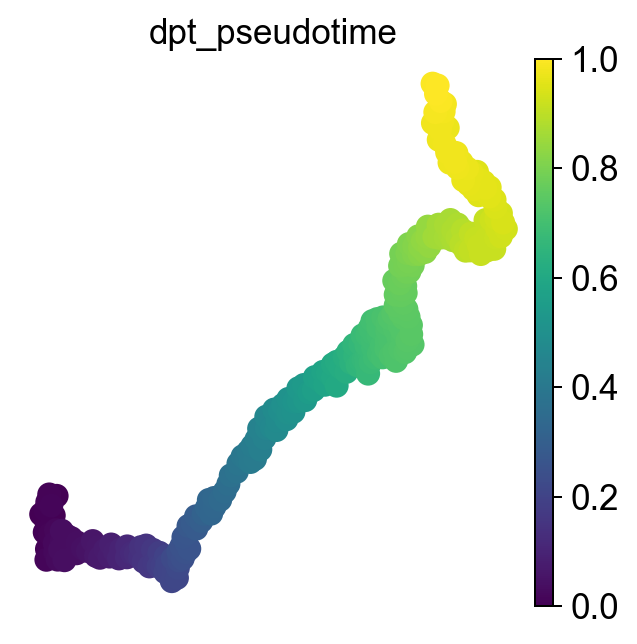

In [ ]:
# Define barcode
root_cell_barcode ='8_5_region3_bkbhinfk-1'

# Find the row index (row label) corresponding to the barcode in the cell_id column
if 'cell_id' in adata3.obs.columns:
    match = adata3.obs[adata3.obs['cell_id'] == root_cell_barcode]
    if not match.empty:
        root_index_label = match.index[0]  # row label
        root_index = adata3.obs.index.get_loc(root_index_label)  # integer position
        adata3.uns['iroot'] = root_index
    else:
        raise ValueError("Barcode not found in adata.obs['cell_id']")
else:
    raise ValueError("No 'cell_id' column in adata.obs")

  # Use spatial embedding to compute pseudotime
sc.pp.neighbors(adata3, use_rep="X_spatial", n_neighbors=15)
sc.tl.dpt(adata3)
sc.tl.diffmap(adata3)

# Plot
sc.pl.embedding(
    adata3,
    basis="X_spatial",
    color="dpt_pseudotime",
    cmap="viridis",
    s=370, frameon=False,
    #title="Spatial Pseudotime (Root from Barcode)", frameon=False,
    save='_NC_trigeminal__UMAP_2__.svg'
)



In [ ]:
adata=adata3.copy()

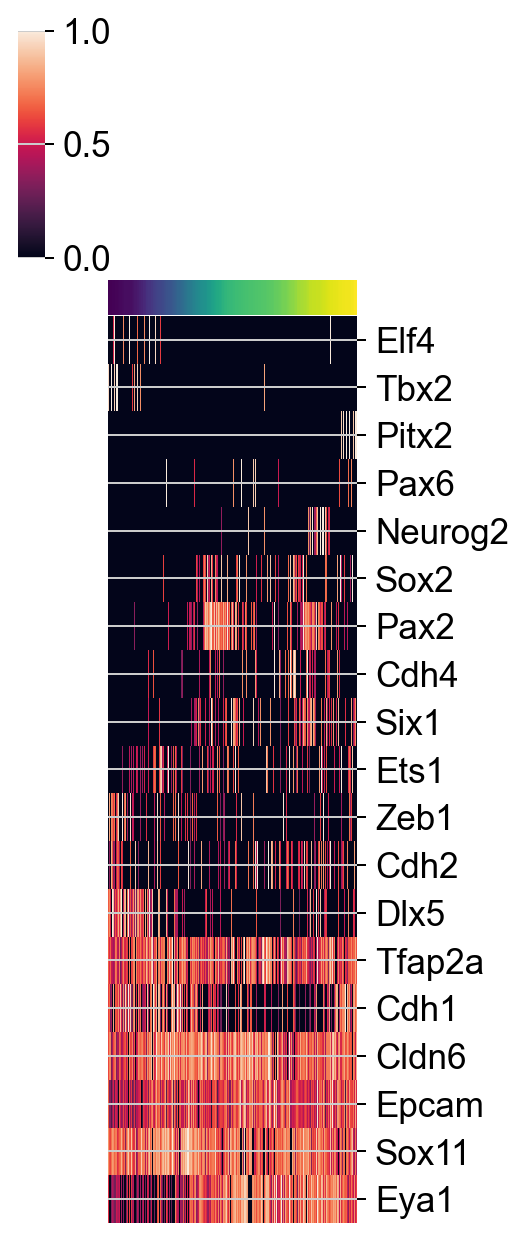

In [ ]:
genes_all = [ 'Elf4', 'Tbx2','Pitx2','Pax6', 'Neurog2',    'Sox2','Pax2',  "Cdh4",   'Six1',   'Ets1', 'Zeb1',  "Cdh2",  'Dlx5', "Tfap2a", "Cdh1", "Cldn6", "Epcam", "Sox11", "Eya1" ]


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib import cm

# 1. Remove duplicates and keep only genes present in data
genes_all = list(dict.fromkeys(genes_all))
genes_exist = [g for g in genes_all if g in adata.var_names]

# 2. Sort cells by pseudotime
adata_sorted = adata[adata.obs.sort_values("dpt_pseudotime").index, :]

# 3. Extract expression matrix
expr = adata_sorted[:, genes_exist].X
if not isinstance(expr, np.ndarray):
    expr = expr.toarray()

# 4. Percentile scaling (1st to 99th)
p1 = np.percentile(expr, 1, axis=0)
p99 = np.percentile(expr, 99, axis=0)
expr_scaled = np.clip((expr - p1) / (p99 - p1 + 1e-8), 0, 1)

# 5. Create DataFrame
expr_df = pd.DataFrame(expr_scaled, columns=genes_exist)

# Optional: manually reorder genes
manual_order = [g for g in genes_all if g in expr_df.columns]
expr_df_sorted = expr_df[manual_order]

# 6. Get pseudotime colors
pseudotime_values = adata_sorted.obs['dpt_pseudotime'].values
norm = Normalize(vmin=pseudotime_values.min(), vmax=pseudotime_values.max())
pseudotime_colors = cm.viridis(norm(pseudotime_values))

# 7. Plot and save heatmap
g = sns.clustermap(
    expr_df_sorted.T,
    col_colors=pseudotime_colors,
    row_cluster=False,
    col_cluster=False,
   # cmap="magma",
    xticklabels=False,
    yticklabels=True,
    figsize=(3, 7),
)

# Save to SVG
g.savefig("_NC_trigeminal__heat__2.svg")

/home/julia/miniconda3/envs/stlearn_Xenium/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/julia/miniconda3/envs/stlearn_Xenium/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


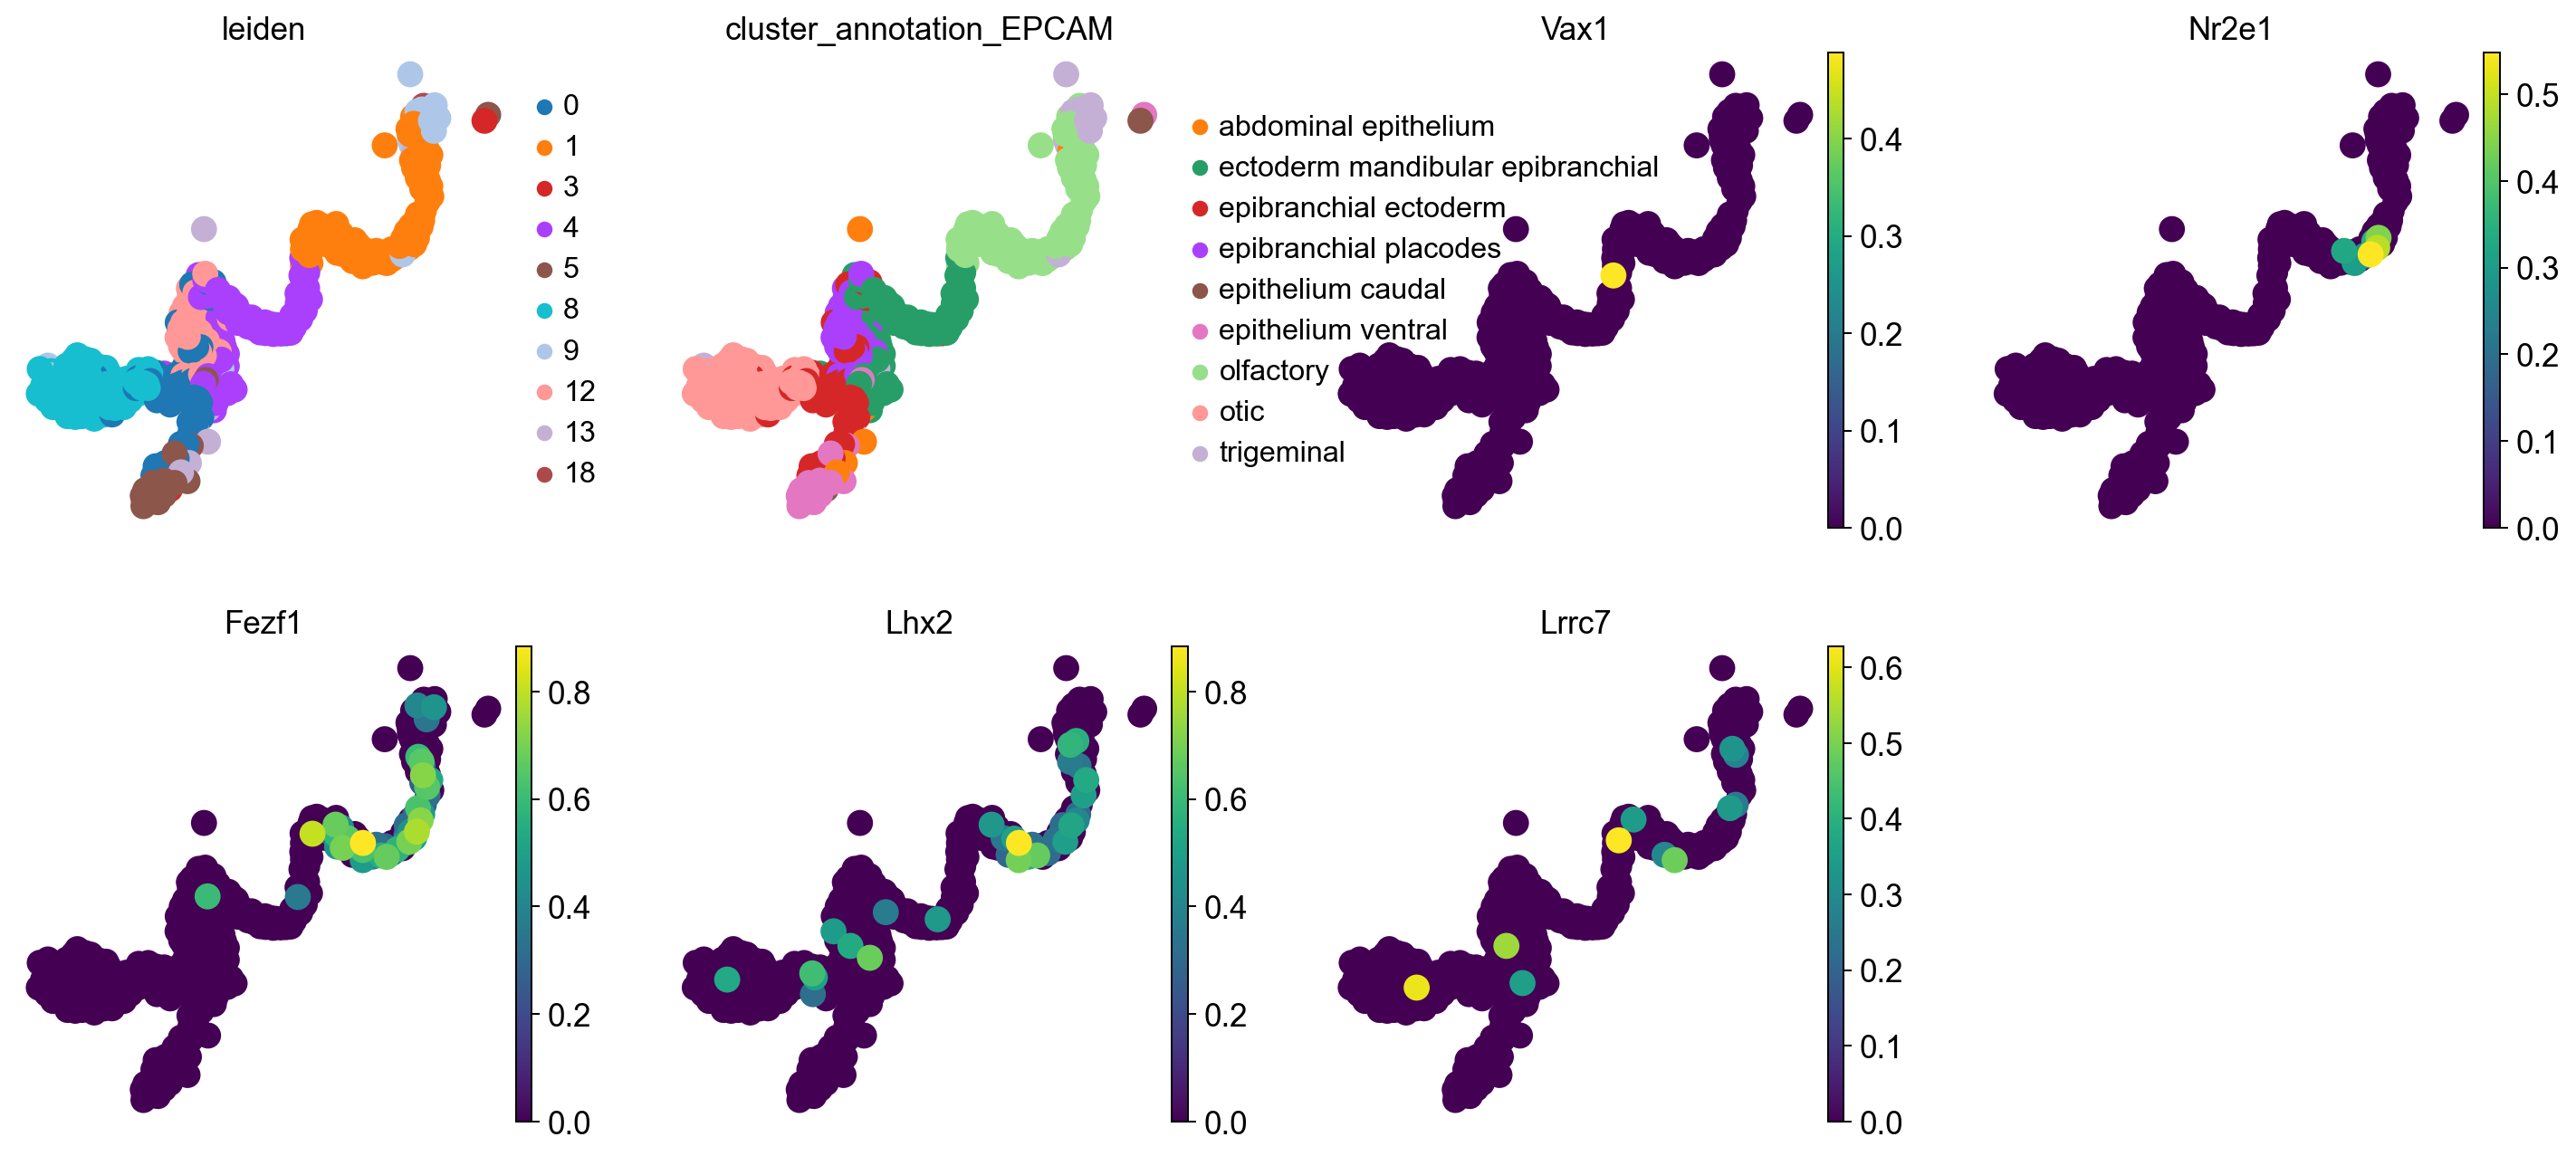

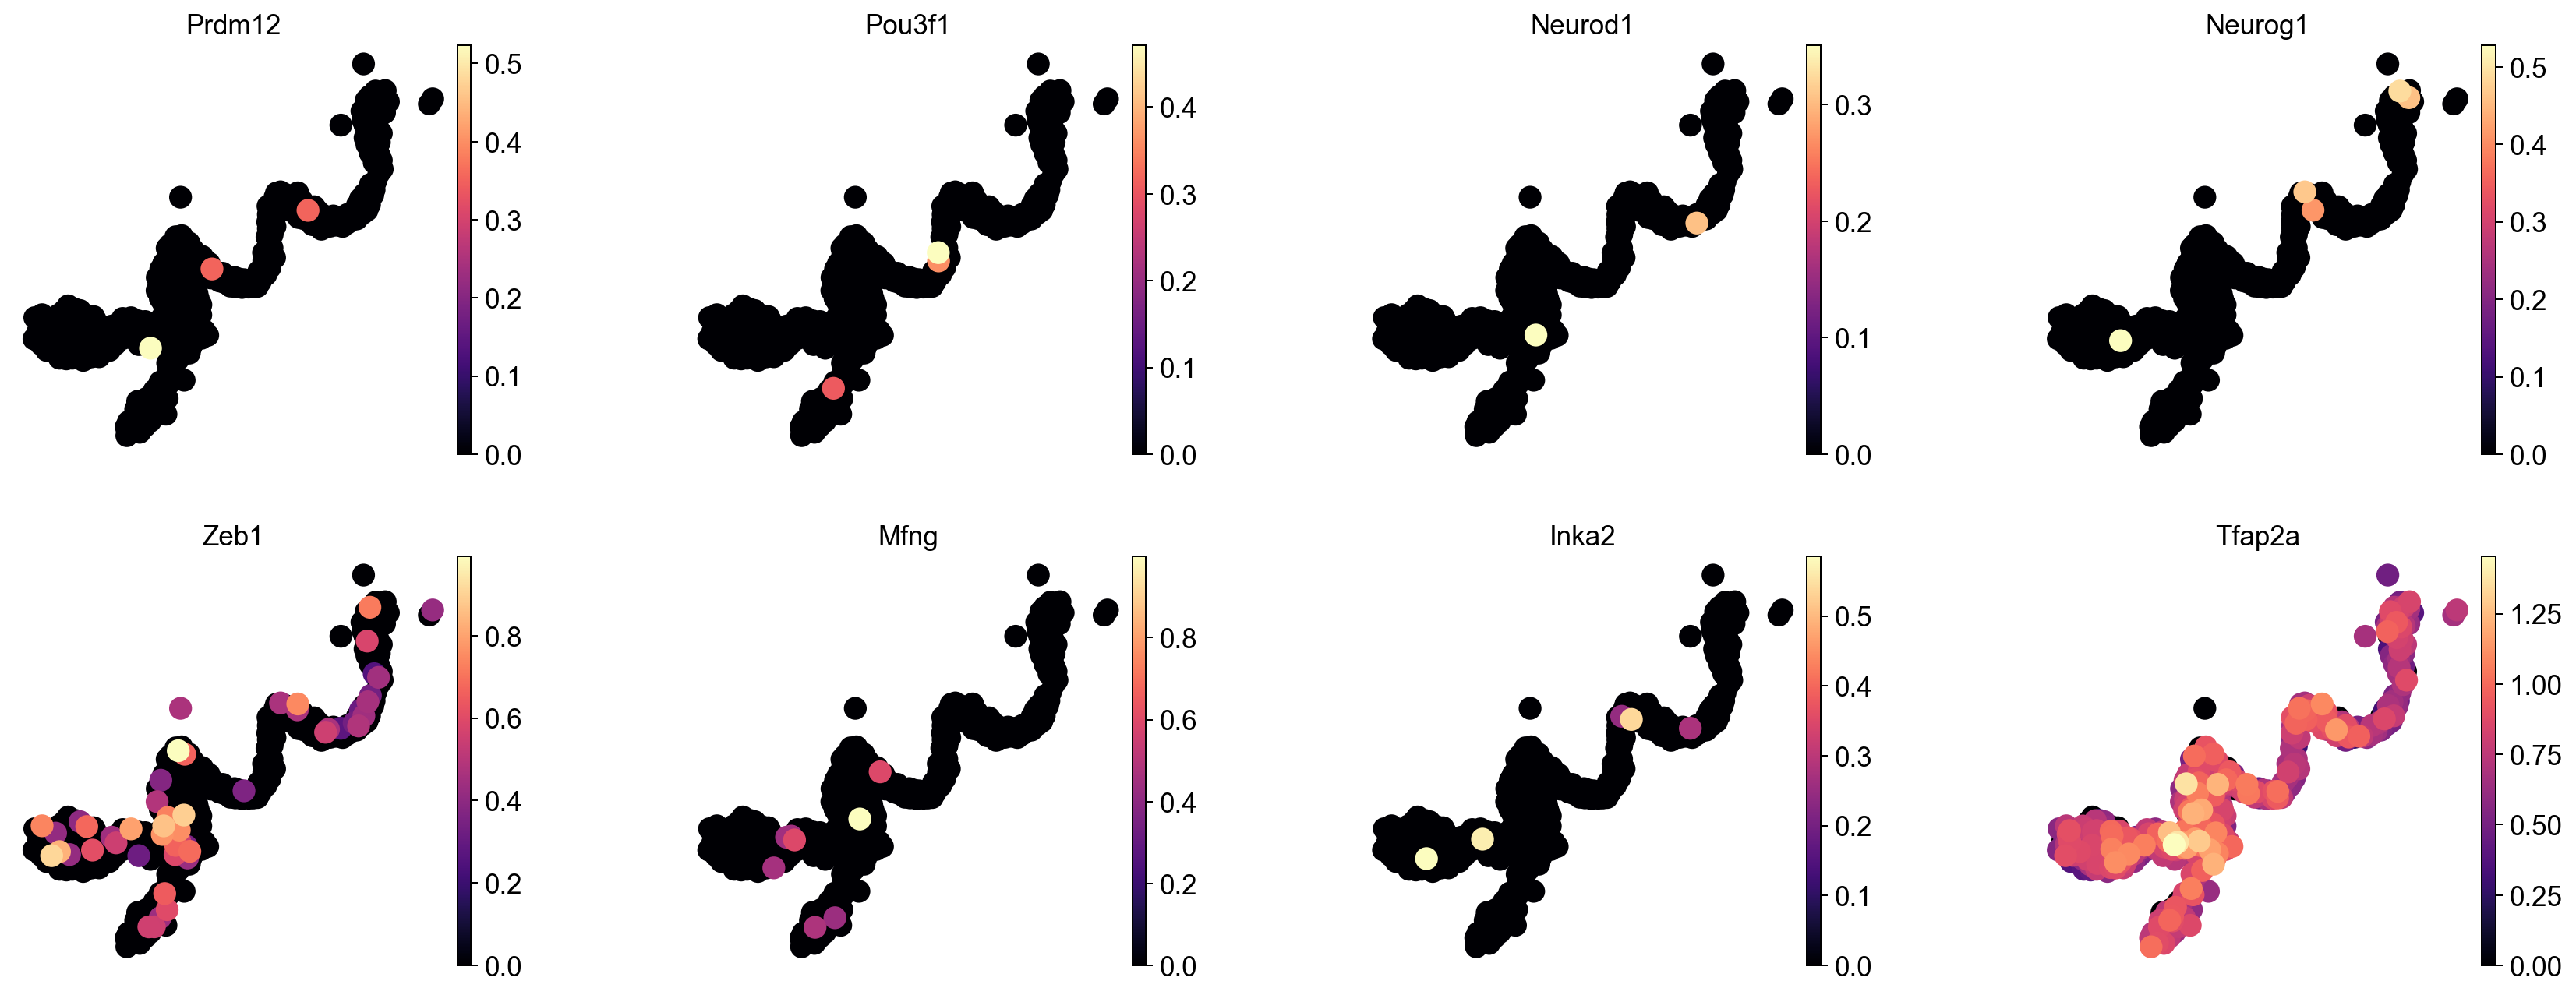

In [ ]:
df = pd.read_csv("/home/julia/Xenioum/Heat_maps__Xenium/3__8_4/placodes_skin/pl_skin5.csv", sep=";")
df
df_cleaned = df.iloc[2:].reset_index(drop=True)
# Rename the column
df_cleaned.columns = ["raw"]
# Split by comma into multiple columns
df_split = df_cleaned["raw"].str.split(",", expand=True)
df_split
df_split.columns = ["Cell ID", "Cluster", "Transcripts", "Area (µm^2)"]
df_split
barcodes=df_split['Cell ID'].to_list()
#barcodes

barcodes_prefixed6 = ['8_5_region3_'+bc for bc in barcodes]
#barcodes_prefixed5
subset_filtered6 = adata1_ep[adata1_ep.obs['cell_id'].isin(barcodes_prefixed6)].copy()
subset_filtered6

#Otic
sc.pl.embedding(subset_filtered6, basis="X_spatial", color=['leiden','cluster_annotation_EPCAM', 'Vax1', 'Nr2e1', 'Fezf1', 'Lhx2', 'Lrrc7',], frameon=False, s=530,)

# Trigeminal
sc.pl.embedding(subset_filtered6, basis="X_spatial", color=[   'Prdm12' , 'Pou3f1', 'Neurod1', 'Neurog1', 'Zeb1', 'Mfng', 'Inka2', 'Tfap2a'],
           legend_loc='on data', wspace=0.4, frameon=False, size=550, color_map='magma')

In [ ]:
subset_filtered6.obs['cluster_annotation_EPCAM'].unique().tolist()

['otic',
 'epibranchial ectoderm',
 'ectoderm mandibular epibranchial',
 'epibranchial placodes',
 'abdominal epithelium',
 'epithelium ventral',
 'trigeminal',
 'olfactory',
 'epithelium caudal']

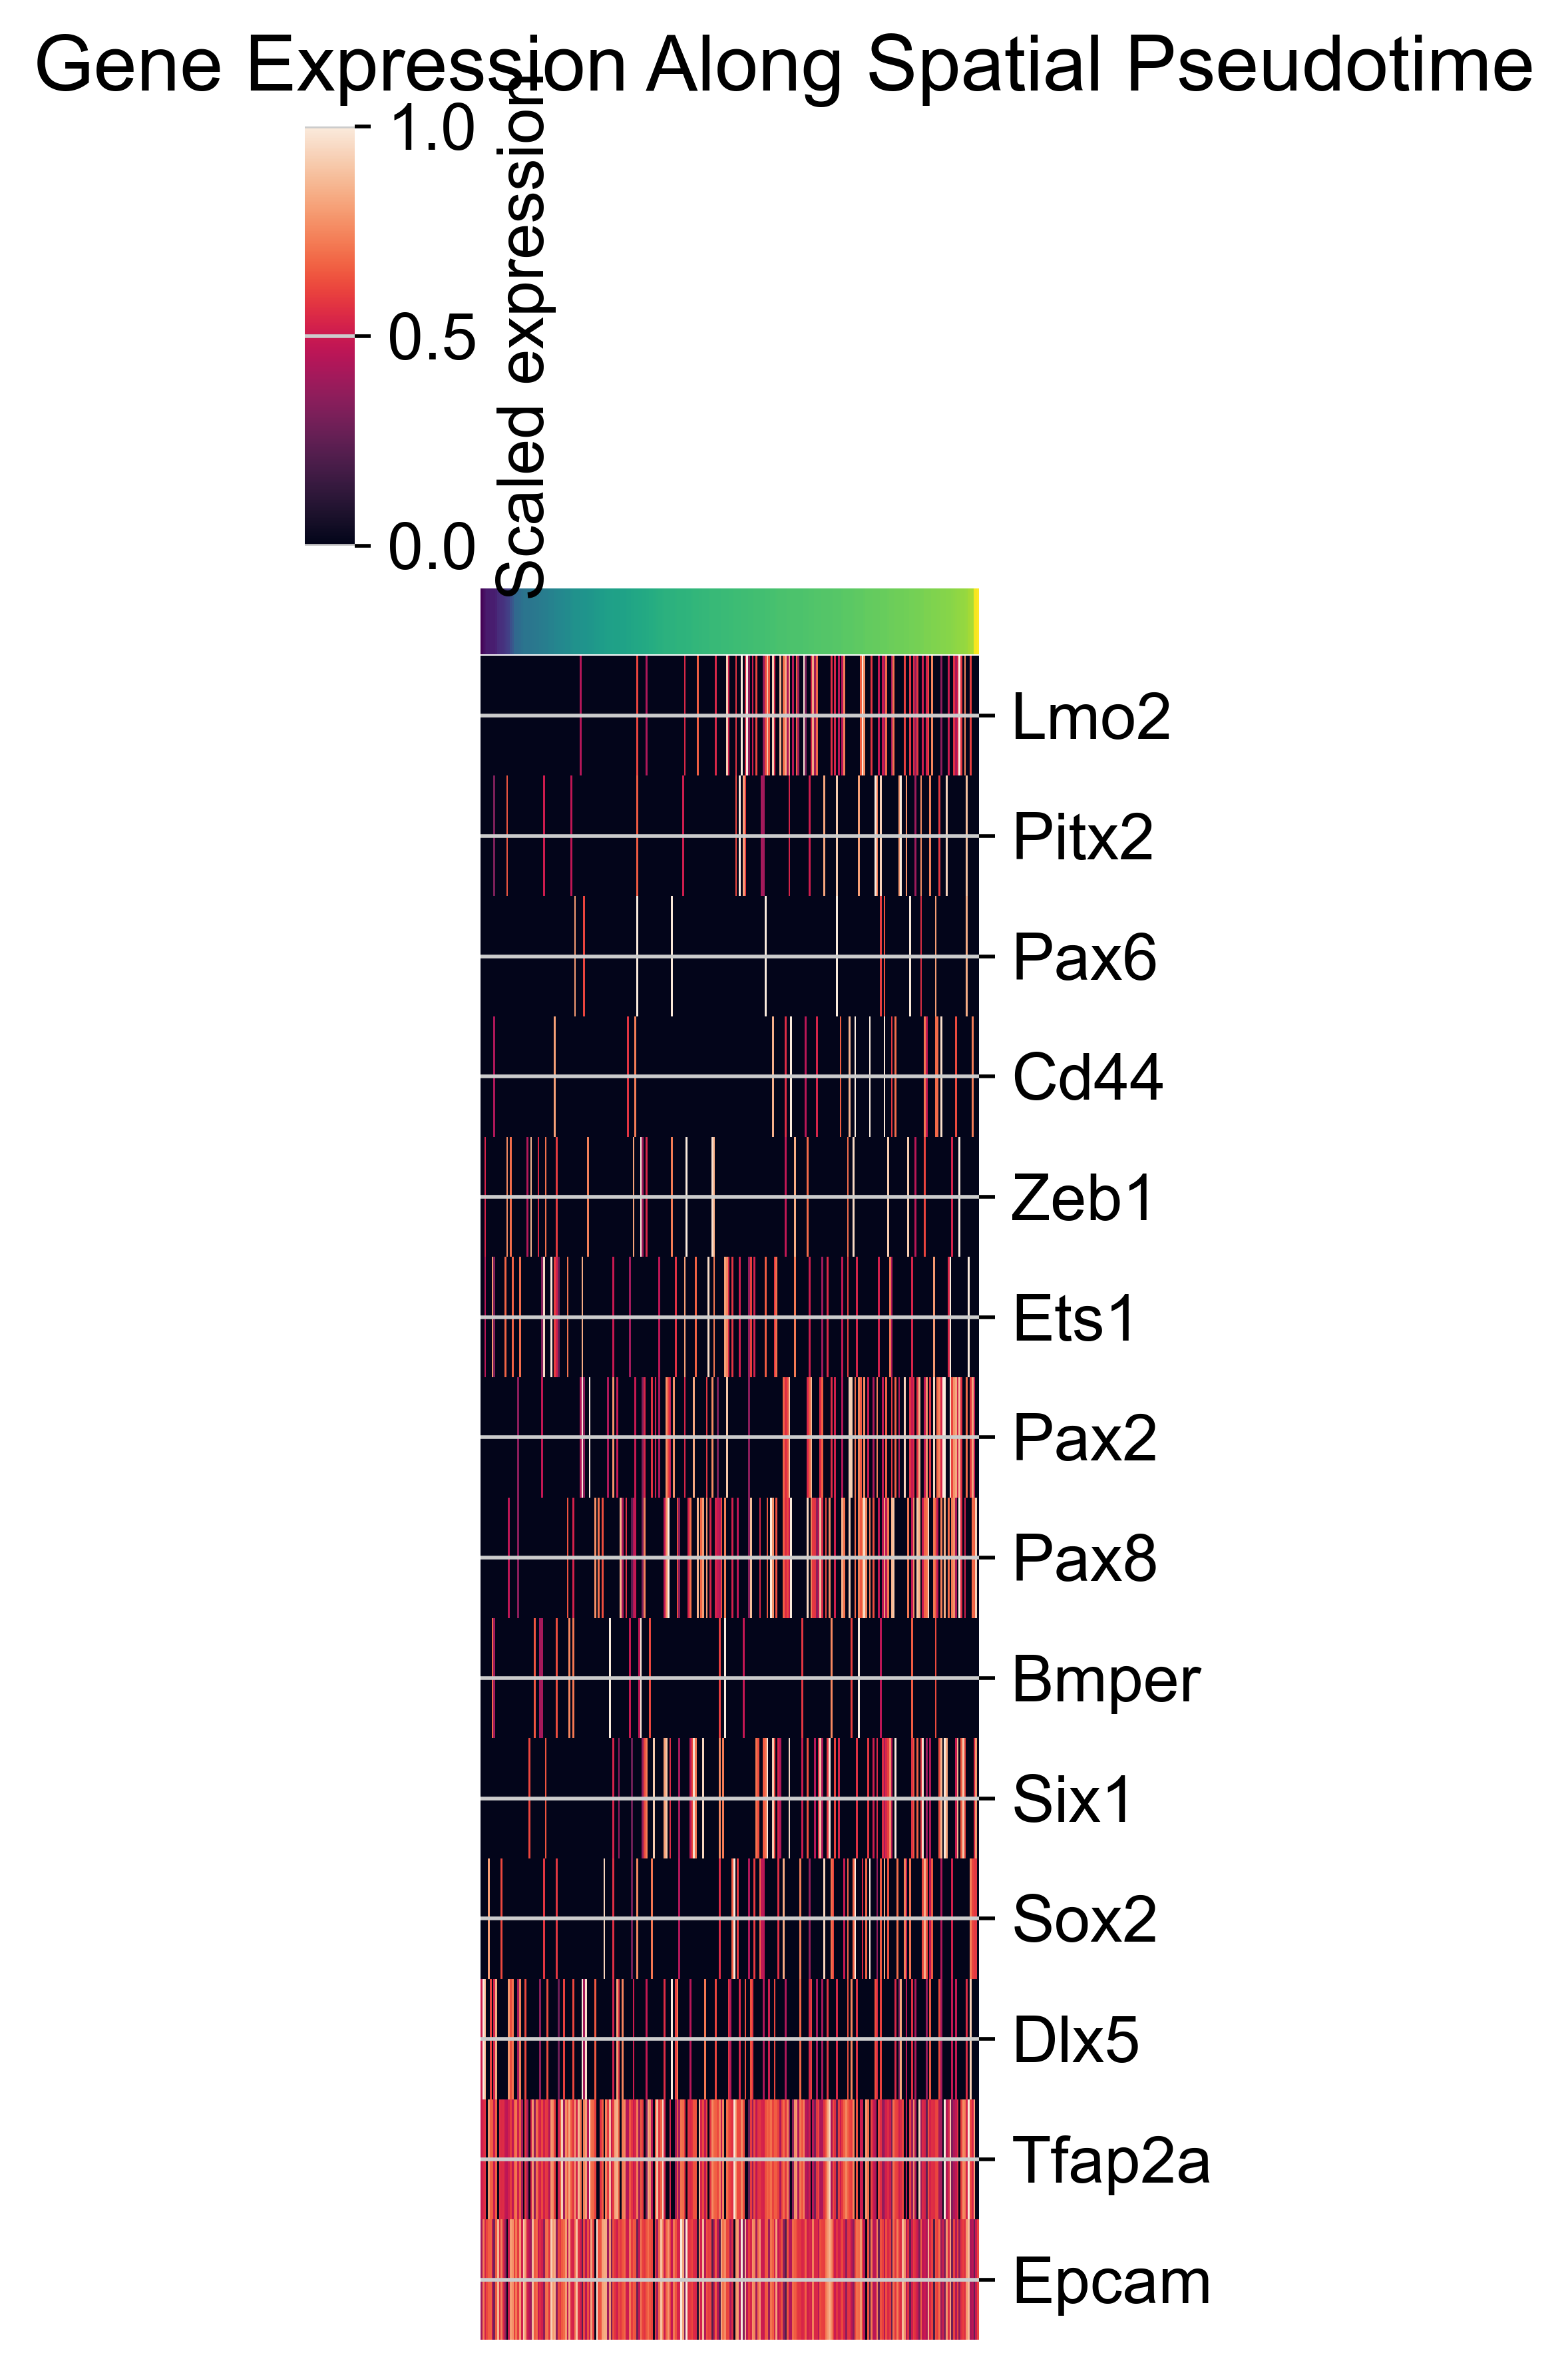

In [ ]:
genes_all = [ 'Lmo2',  'Pitx2',     'Pax6',  'Cd44',   'Zeb1','Zeb1',  'Ets1', 'Pax2', 'Pax8',  'Bmper', 'Six1', 'Sox2',  'Dlx5', 'Tfap2a', 'Epcam', ]

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib import cm

# 1. Remove duplicates and keep only genes present in data
genes_all = list(dict.fromkeys(genes_all))
genes_exist = [g for g in genes_all if g in adata3.var_names]

# 2. Sort cells by pseudotime
adata_sorted = adata3[adata3.obs.sort_values("dpt_pseudotime").index, :]

# 3. Extract expression matrix
expr = adata_sorted[:, genes_exist].X
if not isinstance(expr, np.ndarray):
    expr = expr.toarray()

# 4. Percentile scaling (1st to 99th)
p1 = np.percentile(expr, 1, axis=0)
p99 = np.percentile(expr, 99, axis=0)
expr_scaled = np.clip((expr - p1) / (p99 - p1 + 1e-8), 0, 1)

# 5. Create DataFrame
expr_df = pd.DataFrame(expr_scaled, columns=genes_exist)

# Optional: manually reorder genes
manual_order = [g for g in genes_all if g in expr_df.columns]
expr_df_sorted = expr_df[manual_order]

# 6. Get pseudotime colors
pseudotime_values = adata_sorted.obs['dpt_pseudotime'].values
norm = Normalize(vmin=pseudotime_values.min(), vmax=pseudotime_values.max())
pseudotime_colors = cm.viridis(norm(pseudotime_values))

# 7. Plot heatmap
sns.clustermap(
    expr_df_sorted.T,
    col_colors=pseudotime_colors,
    row_cluster=False,
    col_cluster=False,
   # cmap="magma",
    xticklabels=False,
    yticklabels=True,
    figsize=(3,7),
    cbar_kws={"label": "Scaled expression"}
)

plt.suptitle("Gene Expression Along Spatial Pseudotime", y=1.02)
plt.show()

In [ ]:
### Olfactory

/home/julia/miniconda3/envs/stlearn_Xenium/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


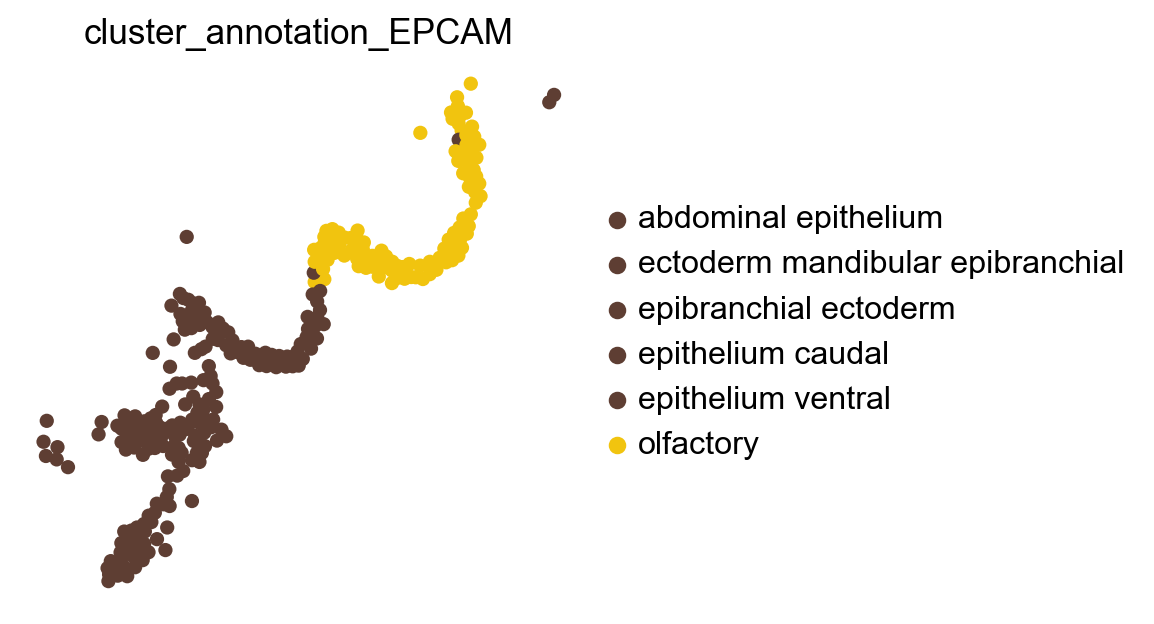

In [ ]:
#subset_filtered6.obs['cluster_annotation_EPCAM'].unique().tolist()

# Define the clusters you want
selected_clusters =[
    #'otic',
 'epibranchial ectoderm',
 'ectoderm mandibular epibranchial',
# 'epibranchial placodes',
 'abdominal epithelium',
 'epithelium ventral',
# 'trigeminal',
 'olfactory',
 'epithelium caudal']
# Subset the AnnData object
subset_nc_trigeminal5= subset_filtered6[subset_filtered6.obs['cluster_annotation_EPCAM'].isin(selected_clusters)].copy()


# Define custom color palette
highlight_colors = {
      'olfactory': '#f1c40f',  # yellow
    'trigeminal': '#e67e22',  # orange
   'ectoderm mandible epibranchial':'#5e3e33',
    'neural crest': '#4dd0e1',
   'epithelium body': '#5e3e33',
  'epithelium caudal': '#5e3e33',
'epibranchial placodes': '#7d3c98',
   'epibranchial ectoderm including placode cluster 18': '#5e3e33',
    'adenohypo placode': 'blue',
  'ectoderm abdominal': '#5e3e33',
    'otic': '#2e86c1',
    'abdominal epithelium': '#5e3e33',
    'ectoderm mandibular epibranchial': '#5e3e33','epithelium ventral': '#5e3e33',
    'epibranchial ectoderm': '#5e3e33',

    'Other': 'lightgray'
}

# Plot with custom colors
sc.pl.embedding(
    subset_nc_trigeminal5,
    basis='X_spatial',
    color='cluster_annotation_EPCAM',
    palette=highlight_colors,
    frameon=False,
    s=130, save='_NC_trigeminal__UMAP_1.png'
)




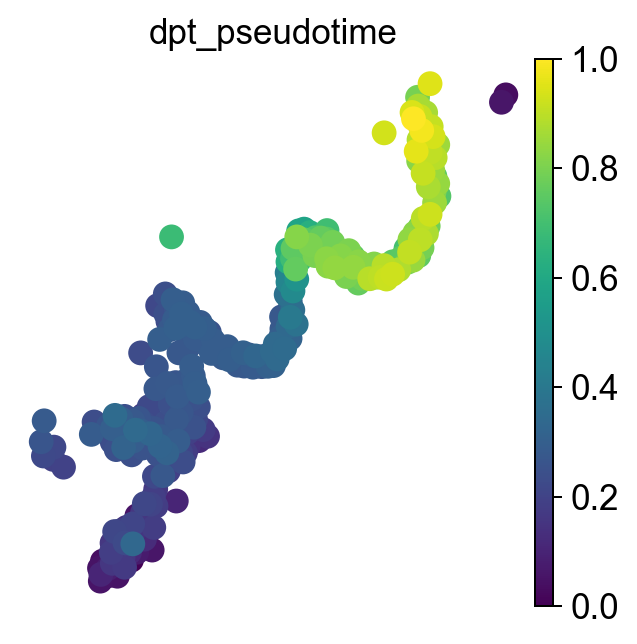

In [ ]:
subset=subset_nc_trigeminal5.copy()

sc.pp.pca(subset)
sc.pp.neighbors(subset, use_rep='X_pca')
sc.tl.diffmap(subset)
# Select one cell from the 'neural crest' cluster to use as root
neural_crest_cells = subset.obs_names[subset.obs['cluster_annotation_EPCAM'] ==    'epithelium caudal']

#neural_crest_cells = subset.obs_names[subset.obs['cluster_annotation_EPCAM'] == 'olfactory']
root_cell = neural_crest_cells[0]  # pick the first one, or use a more specific one if you like

# Set root cell index
subset.uns['iroot'] = subset.obs_names.get_loc(root_cell)

sc.tl.dpt(subset)
sc.pl.embedding(subset, basis='X_spatial', color='dpt_pseudotime', frameon=False, save='_Pseudotime__UMAP_1.png')
#sc.pl.embedding(subset, basis='diffmap', color='dpt_pseudotime')

In [ ]:
adata=subset.copy()

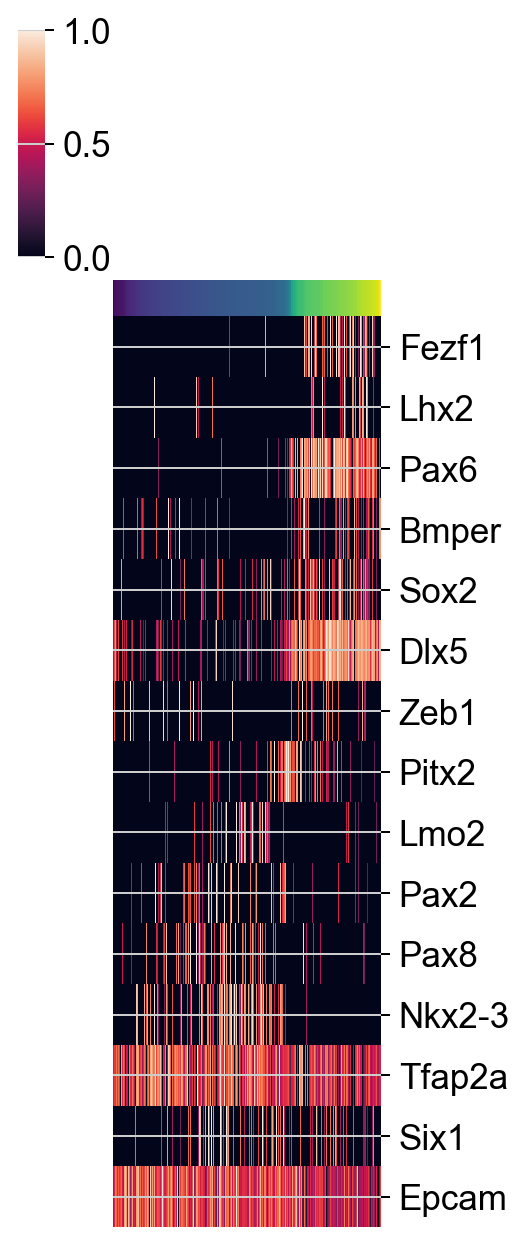

In [ ]:
genes_all = [ 'Fezf1', 'Lhx2',   'Pax6', 'Bmper',  'Sox2',  'Dlx5',    'Zeb1', 'Pitx2', 'Lmo2','Zeb1',  'Lmo2','Pax2',  'Pax8',  'Nkx2-3', 'Tfap2a', 'Six1', 'Epcam','Pax2']



import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib import cm

# 1. Remove duplicates and keep only genes present in data
genes_all = list(dict.fromkeys(genes_all))
genes_exist = [g for g in genes_all if g in adata.var_names]

# 2. Sort cells by pseudotime
adata_sorted = adata[adata.obs.sort_values("dpt_pseudotime").index, :]

# 3. Extract expression matrix
expr = adata_sorted[:, genes_exist].X
if not isinstance(expr, np.ndarray):
    expr = expr.toarray()

# 4. Percentile scaling (1st to 99th)
p1 = np.percentile(expr, 1, axis=0)
p99 = np.percentile(expr, 99, axis=0)
expr_scaled = np.clip((expr - p1) / (p99 - p1 + 1e-8), 0, 1)

# 5. Create DataFrame
expr_df = pd.DataFrame(expr_scaled, columns=genes_exist)

# Optional: manually reorder genes
manual_order = [g for g in genes_all if g in expr_df.columns]
expr_df_sorted = expr_df[manual_order]

# 6. Get pseudotime colors
pseudotime_values = adata_sorted.obs['dpt_pseudotime'].values
norm = Normalize(vmin=pseudotime_values.min(), vmax=pseudotime_values.max())
pseudotime_colors = cm.viridis(norm(pseudotime_values))

# 7. Plot and save heatmap
g = sns.clustermap(
    expr_df_sorted.T,
    col_colors=pseudotime_colors,
    row_cluster=False,
    col_cluster=False,
   # cmap="magma",
    xticklabels=False,
    yticklabels=True,
    figsize=(3, 7),
)

# Save to SVG
g.savefig("_NC_trigeminal__heat__1.svg")

/home/julia/miniconda3/envs/stlearn_Xenium/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/julia/miniconda3/envs/stlearn_Xenium/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


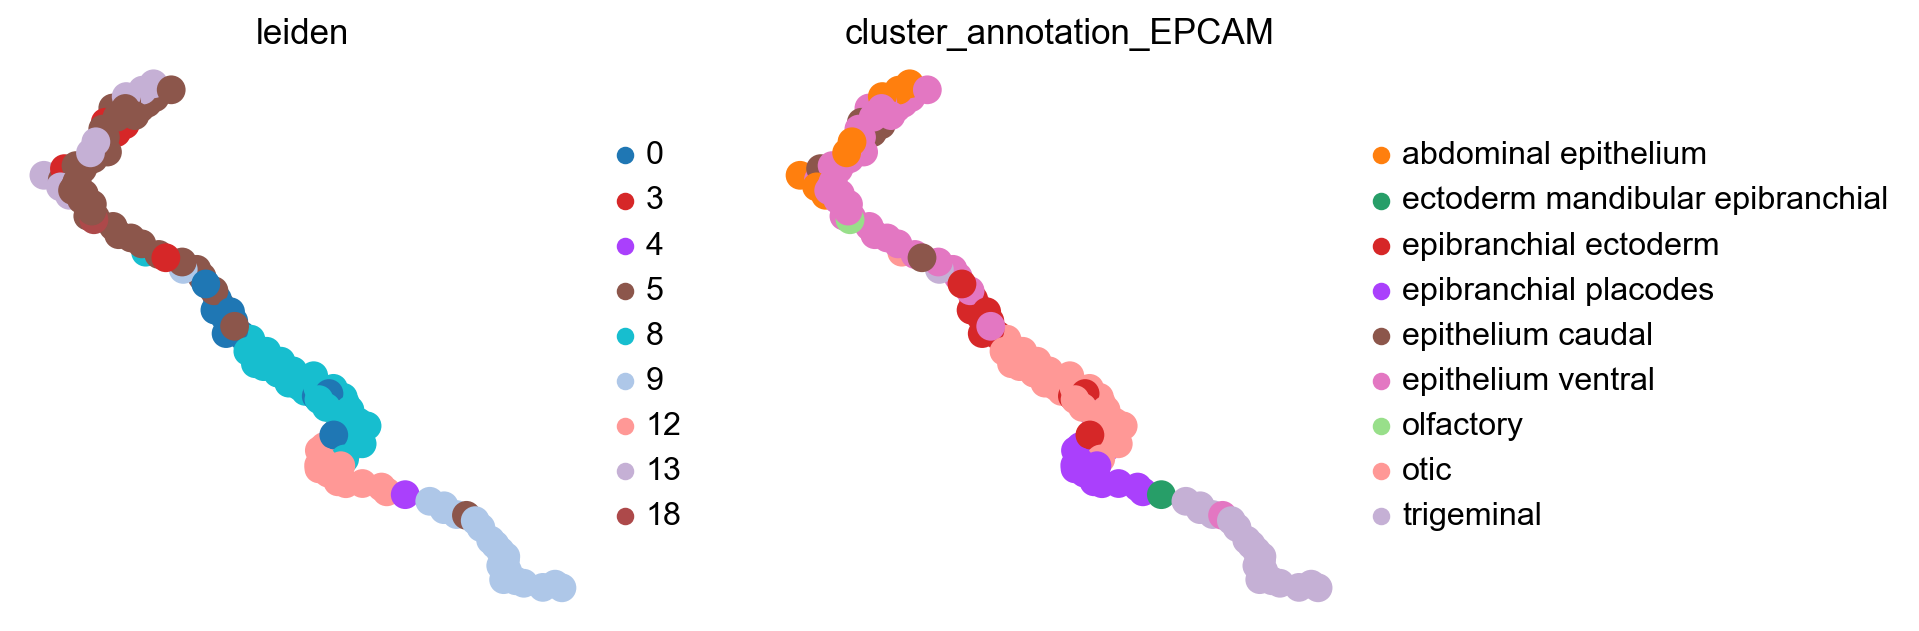

In [ ]:
df = pd.read_csv("/home/julia/Xenioum/Heat_maps__Xenium/3__8_4/placodes_skin/pl_skin7.csv", sep=";")
df
df_cleaned = df.iloc[2:].reset_index(drop=True)
# Rename the column
df_cleaned.columns = ["raw"]
# Split by comma into multiple columns
df_split = df_cleaned["raw"].str.split(",", expand=True)
df_split
df_split.columns = ["Cell ID", "Cluster", "Transcripts", "Area (µm^2)"]
df_split
barcodes=df_split['Cell ID'].to_list()
#barcodes

barcodes_prefixed6 = ['8_5_region3_'+bc for bc in barcodes]
#barcodes_prefixed5
subset_filtered6 = adata1_ep[adata1_ep.obs['cell_id'].isin(barcodes_prefixed6)].copy()
subset_filtered6

#Otic
sc.pl.embedding(subset_filtered6, basis="X_spatial", color=['leiden','cluster_annotation_EPCAM', ], frameon=False, s=530,)



/home/julia/miniconda3/envs/stlearn_Xenium/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


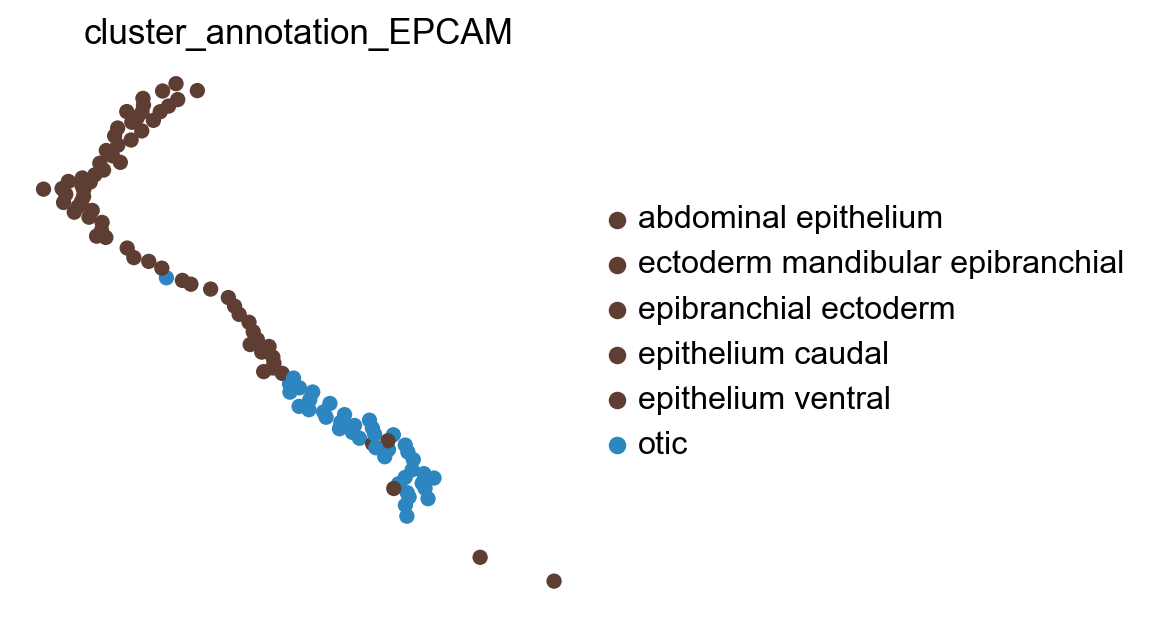

In [ ]:
#subset_filtered6.obs['cluster_annotation_EPCAM'].unique().tolist()

# Define the clusters you want
selected_clusters =[
    'otic',
 'epibranchial ectoderm',
 'ectoderm mandibular epibranchial',
# 'epibranchial placodes',
 'abdominal epithelium',
 'epithelium ventral',
# 'trigeminal',
# 'olfactory',
 'epithelium caudal']
# Subset the AnnData object
subset_nc_trigeminal5= subset_filtered6[subset_filtered6.obs['cluster_annotation_EPCAM'].isin(selected_clusters)].copy()


# Define custom color palette
highlight_colors = {
      'olfactory': '#f1c40f',  # yellow
    'trigeminal': '#e67e22',  # orange
   'ectoderm mandible epibranchial':'#5e3e33',
    'neural crest': '#4dd0e1',
   'epithelium body': '#5e3e33',
  'epithelium caudal': '#5e3e33',
'epibranchial placodes': '#7d3c98',
   'epibranchial ectoderm including placode cluster 18': '#5e3e33',
    'adenohypo placode': 'blue',
  'ectoderm abdominal': '#5e3e33',
    'otic': '#2e86c1',
    'abdominal epithelium': '#5e3e33',
    'ectoderm mandibular epibranchial': '#5e3e33','epithelium ventral': '#5e3e33',
    'epibranchial ectoderm': '#5e3e33',

    'Other': 'lightgray'
}

# Plot with custom colors
sc.pl.embedding(
    subset_nc_trigeminal5,
    basis='X_spatial',
    color='cluster_annotation_EPCAM',
    palette=highlight_colors,
    frameon=False,
    s=150, save='_otic__UMAP__1.png'
)




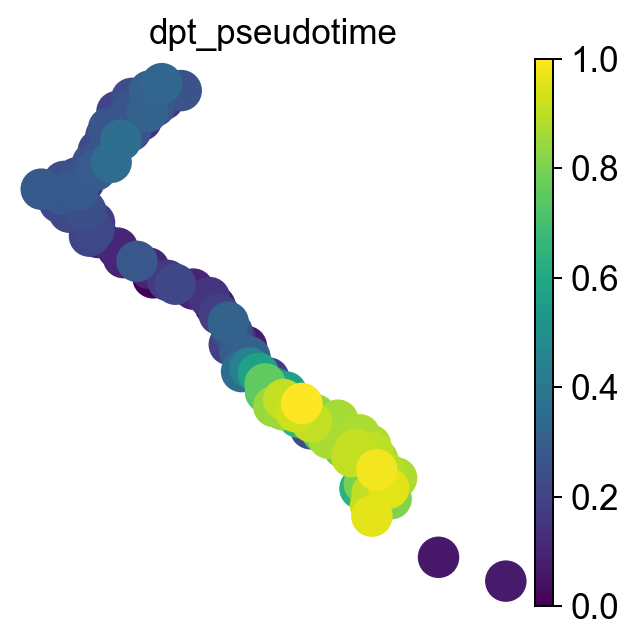

In [ ]:
subset1=subset_nc_trigeminal5.copy()

sc.pp.pca(subset1)
sc.pp.neighbors(subset1, use_rep='X_pca')
sc.tl.diffmap(subset1)
# Select one cell from the 'neural crest' cluster to use as root
neural_crest_cells = subset1.obs_names[subset1.obs['cluster_annotation_EPCAM'] ==    'otic']

#neural_crest_cells = subset.obs_names[subset.obs['cluster_annotation_EPCAM'] == 'olfactory']
root_cell = neural_crest_cells[0]  # pick the first one, or use a more specific one if you like

# Set root cell index
subset1.uns['iroot'] = subset1.obs_names.get_loc(root_cell)

sc.tl.dpt(subset1)
sc.pl.embedding(subset1, basis='X_spatial', color='dpt_pseudotime', frameon=False, save='_otic__UMAP__pseudotime_1.png')
#sc.pl.embedding(subset, basis='diffmap', color='dpt_pseudotime')

In [ ]:
sc.settings.set_figure_params(dpi=90)

In [ ]:
adata=subset1.copy()

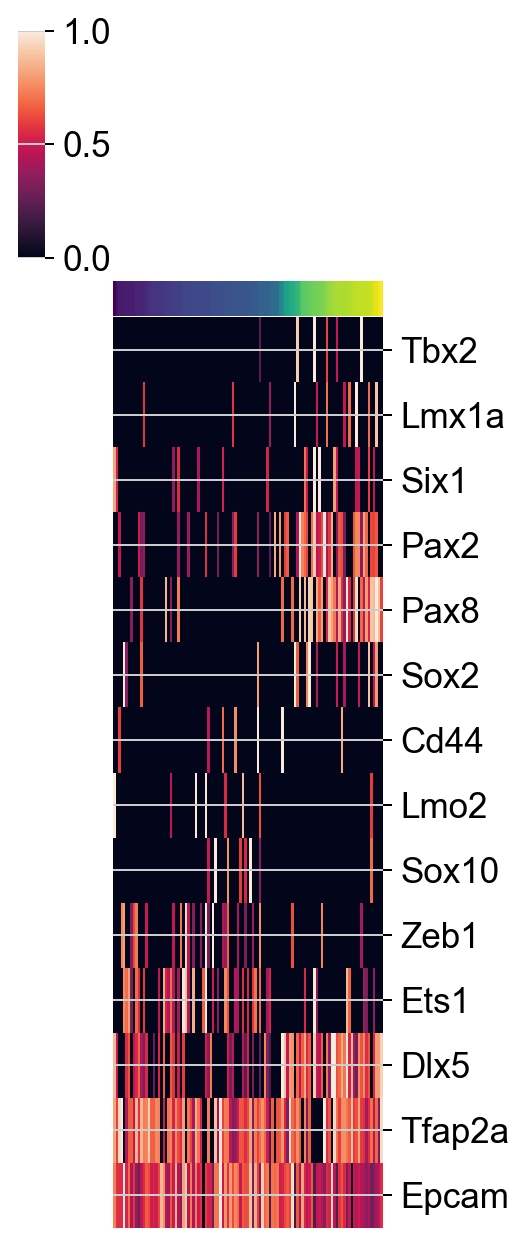

In [ ]:
genes_all = ['Tbx2', 'Lmx1a', 'Six1', 'Pax2', 'Pax8','Sox2', 'Cd44','Lmo2', 'Sox10' ,'Cd44',   'Zeb1','Zeb1',  'Ets1',      'Dlx5', 'Tfap2a', 'Epcam', ]



import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib import cm

# 1. Remove duplicates and keep only genes present in data
genes_all = list(dict.fromkeys(genes_all))
genes_exist = [g for g in genes_all if g in adata.var_names]

# 2. Sort cells by pseudotime
adata_sorted = adata[adata.obs.sort_values("dpt_pseudotime").index, :]

# 3. Extract expression matrix
expr = adata_sorted[:, genes_exist].X
if not isinstance(expr, np.ndarray):
    expr = expr.toarray()

# 4. Percentile scaling (1st to 99th)
p1 = np.percentile(expr, 1, axis=0)
p99 = np.percentile(expr, 99, axis=0)
expr_scaled = np.clip((expr - p1) / (p99 - p1 + 1e-8), 0, 1)

# 5. Create DataFrame
expr_df = pd.DataFrame(expr_scaled, columns=genes_exist)

# Optional: manually reorder genes
manual_order = [g for g in genes_all if g in expr_df.columns]
expr_df_sorted = expr_df[manual_order]

# 6. Get pseudotime colors
pseudotime_values = adata_sorted.obs['dpt_pseudotime'].values
norm = Normalize(vmin=pseudotime_values.min(), vmax=pseudotime_values.max())
pseudotime_colors = cm.viridis(norm(pseudotime_values))

# 7. Plot and save heatmap
g = sns.clustermap(
    expr_df_sorted.T,
    col_colors=pseudotime_colors,
    row_cluster=False,
    col_cluster=False,
   # cmap="magma",
    xticklabels=False,
    yticklabels=True,
    figsize=(3, 7),
)

# Save to SVG
g.savefig("_NC_trigeminal__heat__1.svg")

##